In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function
import itertools
#from tensorflow.python.ops import math_ops

%matplotlib inline

In [2]:
%run ./importWalkingDataConfidence.ipynb

Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)


In [3]:
def get_input_fn(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL_WTS}),
      y = pd.DataFrame(data_y[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [4]:
embedded_ffp_column = tf.contrib.layers.embedding_column(
    tf.contrib.layers.sparse_column_with_integerized_feature("FFPType", 7, combiner=None, dtype=tf.int64), dimension = 7)
# Continuous columns- frontKneesAngle	rearKneesAngle	frontAnkle	rearAnkle	frontHipsAngle
bodyZ = tf.feature_column.numeric_column("bodyAngleZ")
frontK = tf.feature_column.numeric_column("frontKneesAngle")
rearK = tf.feature_column.numeric_column("rearKneesAngle")
frontA = tf.feature_column.numeric_column("frontAnkle")
rearA = tf.feature_column.numeric_column("rearAnkle")
frontH = tf.feature_column.numeric_column("frontHipsAngle")
rearH = tf.feature_column.numeric_column("rearHipsAngle")
swingFtHt = tf.feature_column.numeric_column("swingFtHeight")
speed = tf.feature_column.numeric_column("speed")
gaitTime = tf.feature_column.numeric_column("gaitDuration")

feature_cols = [bodyZ, frontK, rearK, frontA, rearA, frontH, rearH, swingFtHt, speed, gaitTime, embedded_ffp_column]


In [5]:
LABEL_ID = 0;
LABEL = EMOSCORES[LABEL_ID]
WT_COL = WTS_LABEL[LABEL_ID]

In [6]:
# Build 2 layer fully connected DNN with 100, 100 units respectively.

regressor = tf.contrib.learn.DNNRegressor(
  feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionConfidenceRELU", weight_column_name = WT_COL,
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_log_step_count_steps': 100, '_master': '', '_environment': 'local', '_save_summary_steps': 100, '_is_chief': True, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_session_config': None, '_task_type': None, '_num_worker_replicas': 0, '_model_dir': '/DNN/quadMotionConfidenceRELU', '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002468A6AE080>}


In [7]:
# Train.
regressor.fit(input_fn=get_input_fn(X_train_all_wts, y_train, LABEL, num_epochs=None, shuffle=True),steps=2000000) #2000000

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 986, in emit
    msg = self.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 836, in format
    return fmt.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 573, in format
    record.message = record.getMessage()
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 336, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _ru

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU\model.ckpt-517890
INFO:tensorflow:Saving checkpoints for 517891 into /DNN/quadMotionConfidenceRELU\model.ckpt.
INFO:tensorflow:loss = 0.358891, step = 517891
INFO:tensorflow:global_step/sec: 244.911
INFO:tensorflow:loss = 0.235552, step = 517991 (0.411 sec)
INFO:tensorflow:global_step/sec: 258.873
INFO:tensorflow:loss = 0.426497, step = 518091 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.99
INFO:tensorflow:loss = 0.258726, step = 518191 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:loss = 0.234456, step = 518291 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:loss = 0.336223, step = 518391 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:loss = 0.256818, step = 518491 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:loss = 0.358872, step = 518591 (0.381 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.347341, step = 525891 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:loss = 0.376428, step = 525991 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.381
INFO:tensorflow:loss = 0.330289, step = 526091 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.255681, step = 526191 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:loss = 0.490421, step = 526291 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.663
INFO:tensorflow:loss = 0.315365, step = 526391 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.792
INFO:tensorflow:loss = 0.2941, step = 526491 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:loss = 0.302963, step = 526591 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:loss = 0.325626, step = 526691 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.27916, step = 526791 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:

INFO:tensorflow:global_step/sec: 264.345
INFO:tensorflow:loss = 0.363463, step = 534191 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.088
INFO:tensorflow:loss = 0.376494, step = 534291 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.509259, step = 534391 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:loss = 0.324915, step = 534491 (0.378 sec)
INFO:tensorflow:global_step/sec: 259.536
INFO:tensorflow:loss = 0.276541, step = 534591 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.389
INFO:tensorflow:loss = 0.286297, step = 534691 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:loss = 0.429996, step = 534791 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.991
INFO:tensorflow:loss = 0.247823, step = 534891 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.463
INFO:tensorflow:loss = 0.314017, step = 534991 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:loss = 0.397872, step = 535091 (0.380 sec)


INFO:tensorflow:loss = 0.419619, step = 542391 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.256066, step = 542491 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.337
INFO:tensorflow:loss = 0.326347, step = 542591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:loss = 0.262803, step = 542691 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.073
INFO:tensorflow:loss = 0.250604, step = 542791 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.912
INFO:tensorflow:loss = 0.379001, step = 542891 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.683
INFO:tensorflow:loss = 0.343041, step = 542991 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:loss = 0.348118, step = 543091 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.788
INFO:tensorflow:loss = 0.423797, step = 543191 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.636
INFO:tensorflow:loss = 0.378328, step = 543291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.805


INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.374324, step = 550691 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.474
INFO:tensorflow:loss = 0.296756, step = 550791 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.917
INFO:tensorflow:loss = 0.392515, step = 550891 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:loss = 0.361991, step = 550991 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.69
INFO:tensorflow:loss = 0.385743, step = 551091 (0.380 sec)
INFO:tensorflow:global_step/sec: 256.215
INFO:tensorflow:loss = 0.331366, step = 551191 (0.389 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:loss = 0.327788, step = 551291 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.913
INFO:tensorflow:loss = 0.388134, step = 551391 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:loss = 0.40156, step = 551491 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.787
INFO:tensorflow:loss = 0.302421, step = 551591 (0.376 sec)
IN

INFO:tensorflow:loss = 0.448552, step = 558891 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:loss = 0.5532, step = 558991 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.3
INFO:tensorflow:loss = 0.369803, step = 559091 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.410223, step = 559191 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.253499, step = 559291 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.653
INFO:tensorflow:loss = 0.309377, step = 559391 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.346
INFO:tensorflow:loss = 0.298438, step = 559491 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.281
INFO:tensorflow:loss = 0.447095, step = 559591 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.088
INFO:tensorflow:loss = 0.391467, step = 559691 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:loss = 0.238162, step = 559791 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.932
INFO

INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.365632, step = 567191 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:loss = 0.404081, step = 567291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:loss = 0.359557, step = 567391 (0.376 sec)
INFO:tensorflow:global_step/sec: 259.575
INFO:tensorflow:loss = 0.367296, step = 567491 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.368512, step = 567591 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.268
INFO:tensorflow:loss = 0.320204, step = 567691 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.269
INFO:tensorflow:loss = 0.486067, step = 567791 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.005
INFO:tensorflow:loss = 0.226043, step = 567891 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:loss = 0.302527, step = 567991 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:loss = 0.301392, step = 568091 (0.378 sec)
I

INFO:tensorflow:loss = 0.294294, step = 575391 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:loss = 0.450716, step = 575491 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.381
INFO:tensorflow:loss = 0.275016, step = 575591 (0.378 sec)
INFO:tensorflow:global_step/sec: 258.198
INFO:tensorflow:loss = 0.330554, step = 575691 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.251
INFO:tensorflow:loss = 0.405197, step = 575791 (0.390 sec)
INFO:tensorflow:global_step/sec: 258.886
INFO:tensorflow:loss = 0.296906, step = 575891 (0.385 sec)
INFO:tensorflow:global_step/sec: 263.65
INFO:tensorflow:loss = 0.279682, step = 575991 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:loss = 0.347132, step = 576091 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:loss = 0.348793, step = 576191 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.368857, step = 576291 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.365
I

INFO:tensorflow:global_step/sec: 260.914
INFO:tensorflow:loss = 0.351026, step = 583691 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:loss = 0.445383, step = 583791 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.223
INFO:tensorflow:loss = 0.319529, step = 583891 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.657
INFO:tensorflow:loss = 0.337203, step = 583991 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:loss = 0.382222, step = 584091 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.384
INFO:tensorflow:loss = 0.32155, step = 584191 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.274967, step = 584291 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.899
INFO:tensorflow:loss = 0.325882, step = 584391 (0.383 sec)
INFO:tensorflow:global_step/sec: 260.915
INFO:tensorflow:loss = 0.298058, step = 584491 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:loss = 0.301322, step = 584591 (0.378 sec)
I

INFO:tensorflow:loss = 0.347079, step = 591891 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.65
INFO:tensorflow:loss = 0.372408, step = 591991 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.07
INFO:tensorflow:loss = 0.302396, step = 592091 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.295
INFO:tensorflow:loss = 0.290996, step = 592191 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.304
INFO:tensorflow:loss = 0.330851, step = 592291 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.232675, step = 592391 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:loss = 0.464391, step = 592491 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.64
INFO:tensorflow:loss = 0.308965, step = 592591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.801
INFO:tensorflow:loss = 0.572111, step = 592691 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.366191, step = 592791 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.651
INF

INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:loss = 0.532302, step = 600191 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.093
INFO:tensorflow:loss = 0.286735, step = 600291 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:loss = 0.356299, step = 600391 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.279
INFO:tensorflow:loss = 0.29173, step = 600491 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.995
INFO:tensorflow:loss = 0.368864, step = 600591 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.958
INFO:tensorflow:loss = 0.270225, step = 600691 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.446116, step = 600791 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:loss = 0.374379, step = 600891 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.892
INFO:tensorflow:loss = 0.227586, step = 600991 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.62
INFO:tensorflow:loss = 0.261552, step = 601091 (0.382 sec)
IN

INFO:tensorflow:loss = 0.391681, step = 608391 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:loss = 0.415747, step = 608491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:loss = 0.322933, step = 608591 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.218
INFO:tensorflow:loss = 0.268156, step = 608691 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.6
INFO:tensorflow:loss = 0.358589, step = 608791 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:loss = 0.32882, step = 608891 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.972
INFO:tensorflow:loss = 0.380596, step = 608991 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.27
INFO:tensorflow:loss = 0.303294, step = 609091 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.398
INFO:tensorflow:loss = 0.231284, step = 609191 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.652
INFO:tensorflow:loss = 0.291595, step = 609291 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.285
INFO

INFO:tensorflow:global_step/sec: 264.377
INFO:tensorflow:loss = 0.4463, step = 616691 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.382
INFO:tensorflow:loss = 0.240832, step = 616791 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.563
INFO:tensorflow:loss = 0.238988, step = 616891 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:loss = 0.281422, step = 616991 (0.379 sec)
INFO:tensorflow:global_step/sec: 259.558
INFO:tensorflow:loss = 0.467967, step = 617091 (0.386 sec)
INFO:tensorflow:global_step/sec: 256.907
INFO:tensorflow:loss = 0.312051, step = 617191 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.537
INFO:tensorflow:loss = 0.377617, step = 617291 (0.388 sec)
INFO:tensorflow:global_step/sec: 262.299
INFO:tensorflow:loss = 0.240236, step = 617391 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.897
INFO:tensorflow:loss = 0.323784, step = 617491 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:loss = 0.496492, step = 617591 (0.378 sec)
IN

INFO:tensorflow:loss = 0.369559, step = 624891 (0.392 sec)
INFO:tensorflow:global_step/sec: 244.311
INFO:tensorflow:loss = 0.274314, step = 624991 (0.409 sec)
INFO:tensorflow:global_step/sec: 250.451
INFO:tensorflow:loss = 0.483741, step = 625091 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:loss = 0.420074, step = 625191 (0.393 sec)
INFO:tensorflow:global_step/sec: 247.983
INFO:tensorflow:loss = 0.343938, step = 625291 (0.402 sec)
INFO:tensorflow:global_step/sec: 259.559
INFO:tensorflow:loss = 0.236272, step = 625391 (0.386 sec)
INFO:tensorflow:global_step/sec: 260.235
INFO:tensorflow:loss = 0.331126, step = 625491 (0.384 sec)
INFO:tensorflow:global_step/sec: 250.452
INFO:tensorflow:loss = 0.481911, step = 625591 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.256
INFO:tensorflow:loss = 0.421438, step = 625691 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.843
INFO:tensorflow:loss = 0.249512, step = 625791 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.613


INFO:tensorflow:global_step/sec: 266.491
INFO:tensorflow:loss = 0.248804, step = 633191 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.584
INFO:tensorflow:loss = 0.331241, step = 633291 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:loss = 0.327898, step = 633391 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.260729, step = 633491 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.356
INFO:tensorflow:loss = 0.272179, step = 633591 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.073
INFO:tensorflow:loss = 0.343625, step = 633691 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:loss = 0.339474, step = 633791 (0.377 sec)
INFO:tensorflow:global_step/sec: 259.539
INFO:tensorflow:loss = 0.255422, step = 633891 (0.385 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:loss = 0.293146, step = 633991 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.381
INFO:tensorflow:loss = 0.235055, step = 634091 (0.378 sec)


INFO:tensorflow:loss = 0.337459, step = 641391 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.273
INFO:tensorflow:loss = 0.263275, step = 641491 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.37
INFO:tensorflow:loss = 0.231871, step = 641591 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.356
INFO:tensorflow:loss = 0.370643, step = 641691 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.38
INFO:tensorflow:loss = 0.226477, step = 641791 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:loss = 0.265667, step = 641891 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:loss = 0.36466, step = 641991 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:loss = 0.422569, step = 642091 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.086
INFO:tensorflow:loss = 0.44026, step = 642191 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.051
INFO:tensorflow:loss = 0.252761, step = 642291 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:

INFO:tensorflow:global_step/sec: 265.093
INFO:tensorflow:loss = 0.273067, step = 649691 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.294457, step = 649791 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.957
INFO:tensorflow:loss = 0.289621, step = 649891 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.789
INFO:tensorflow:loss = 0.307026, step = 649991 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.410689, step = 650091 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.899
INFO:tensorflow:loss = 0.348015, step = 650191 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.766
INFO:tensorflow:loss = 0.338965, step = 650291 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.306
INFO:tensorflow:loss = 0.393111, step = 650391 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.04
INFO:tensorflow:loss = 0.216974, step = 650491 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.984
INFO:tensorflow:loss = 0.318361, step = 650591 (0.380 sec)
I

INFO:tensorflow:loss = 0.339788, step = 657891 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.676
INFO:tensorflow:loss = 0.358295, step = 657991 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.598
INFO:tensorflow:loss = 0.343577, step = 658091 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:loss = 0.359817, step = 658191 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.81
INFO:tensorflow:loss = 0.247708, step = 658291 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:loss = 0.48455, step = 658391 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:loss = 0.387045, step = 658491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.343816, step = 658591 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:loss = 0.290935, step = 658691 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.032
INFO:tensorflow:loss = 0.266228, step = 658791 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.707
IN

INFO:tensorflow:global_step/sec: 260.236
INFO:tensorflow:loss = 0.285884, step = 666191 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.901
INFO:tensorflow:loss = 0.260283, step = 666291 (0.382 sec)
INFO:tensorflow:global_step/sec: 259.543
INFO:tensorflow:loss = 0.375804, step = 666391 (0.385 sec)
INFO:tensorflow:global_step/sec: 261.616
INFO:tensorflow:loss = 0.301353, step = 666491 (0.382 sec)
INFO:tensorflow:global_step/sec: 259.562
INFO:tensorflow:loss = 0.361578, step = 666591 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:loss = 0.310755, step = 666691 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.268
INFO:tensorflow:loss = 0.281809, step = 666791 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.302
INFO:tensorflow:loss = 0.316599, step = 666891 (0.381 sec)
INFO:tensorflow:global_step/sec: 258.221
INFO:tensorflow:loss = 0.358055, step = 666991 (0.388 sec)
INFO:tensorflow:global_step/sec: 265.748
INFO:tensorflow:loss = 0.372473, step = 667091 (0.375 sec)


INFO:tensorflow:loss = 0.247562, step = 674391 (0.381 sec)
INFO:tensorflow:global_step/sec: 258.885
INFO:tensorflow:loss = 0.259723, step = 674491 (0.386 sec)
INFO:tensorflow:global_step/sec: 262.289
INFO:tensorflow:loss = 0.299706, step = 674591 (0.381 sec)
INFO:tensorflow:global_step/sec: 252.365
INFO:tensorflow:loss = 0.360997, step = 674691 (0.403 sec)
INFO:tensorflow:global_step/sec: 254.262
INFO:tensorflow:loss = 0.269482, step = 674791 (0.386 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:loss = 0.233807, step = 674891 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:loss = 0.278673, step = 674991 (0.381 sec)
INFO:tensorflow:global_step/sec: 260.934
INFO:tensorflow:loss = 0.328283, step = 675091 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.265
INFO:tensorflow:loss = 0.260136, step = 675191 (0.380 sec)
INFO:tensorflow:Saving checkpoints for 675269 into /DNN/quadMotionConfidenceRELU\model.ckpt.
INFO:tensorflow:global_step/sec: 79.1864
INFO:te

INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:loss = 0.288483, step = 682591 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.584
INFO:tensorflow:loss = 0.258781, step = 682691 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.995
INFO:tensorflow:loss = 0.289325, step = 682791 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:loss = 0.419309, step = 682891 (0.384 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.269117, step = 682991 (0.378 sec)
INFO:tensorflow:global_step/sec: 258.221
INFO:tensorflow:loss = 0.392047, step = 683091 (0.387 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.326865, step = 683191 (0.378 sec)
INFO:tensorflow:global_step/sec: 259.575
INFO:tensorflow:loss = 0.348285, step = 683291 (0.386 sec)
INFO:tensorflow:global_step/sec: 265.053
INFO:tensorflow:loss = 0.456735, step = 683391 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.295222, step = 683491 (0.379 sec)
IN

INFO:tensorflow:loss = 0.345287, step = 690791 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:loss = 0.309147, step = 690891 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.977
INFO:tensorflow:loss = 0.246432, step = 690991 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.614
INFO:tensorflow:loss = 0.274884, step = 691091 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.36
INFO:tensorflow:loss = 0.303301, step = 691191 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.676
INFO:tensorflow:loss = 0.322395, step = 691291 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:tensorflow:loss = 0.457695, step = 691391 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.271
INFO:tensorflow:loss = 0.25427, step = 691491 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.93
INFO:tensorflow:loss = 0.333249, step = 691591 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:tensorflow:loss = 0.263583, step = 691691 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.635
INF

INFO:tensorflow:global_step/sec: 260.221
INFO:tensorflow:loss = 0.360046, step = 699091 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.252
INFO:tensorflow:loss = 0.337362, step = 699191 (0.384 sec)
INFO:tensorflow:global_step/sec: 263.642
INFO:tensorflow:loss = 0.25207, step = 699291 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.611
INFO:tensorflow:loss = 0.333615, step = 699391 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.686
INFO:tensorflow:loss = 0.322657, step = 699491 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.267
INFO:tensorflow:loss = 0.450432, step = 699591 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.918
INFO:tensorflow:loss = 0.476029, step = 699691 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.302
INFO:tensorflow:loss = 0.258909, step = 699791 (0.381 sec)
INFO:tensorflow:global_step/sec: 256.211
INFO:tensorflow:loss = 0.295748, step = 699891 (0.390 sec)
INFO:tensorflow:global_step/sec: 263.686
INFO:tensorflow:loss = 0.375205, step = 699991 (0.380 sec)
I

INFO:tensorflow:loss = 0.394898, step = 707291 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.085
INFO:tensorflow:loss = 0.356892, step = 707391 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.75
INFO:tensorflow:loss = 0.296154, step = 707491 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.37
INFO:tensorflow:loss = 0.334221, step = 707591 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.059
INFO:tensorflow:loss = 0.240877, step = 707691 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.781
INFO:tensorflow:loss = 0.265488, step = 707791 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.235
INFO:tensorflow:loss = 0.343291, step = 707891 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.375
INFO:tensorflow:loss = 0.289982, step = 707991 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.498
INFO:tensorflow:loss = 0.473427, step = 708091 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.347
INFO:tensorflow:loss = 0.313335, step = 708191 (0.377 sec)
INFO:tensorflow:global_step/sec: 258.239
IN

INFO:tensorflow:global_step/sec: 263.653
INFO:tensorflow:loss = 0.320328, step = 715591 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.35314, step = 715691 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.087
INFO:tensorflow:loss = 0.331774, step = 715791 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:loss = 0.355277, step = 715891 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.324512, step = 715991 (0.378 sec)
INFO:tensorflow:global_step/sec: 256.892
INFO:tensorflow:loss = 0.252007, step = 716091 (0.389 sec)
INFO:tensorflow:global_step/sec: 260.251
INFO:tensorflow:loss = 0.296766, step = 716191 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.27
INFO:tensorflow:loss = 0.320609, step = 716291 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.55
INFO:tensorflow:loss = 0.432553, step = 716391 (0.385 sec)
INFO:tensorflow:global_step/sec: 261.626
INFO:tensorflow:loss = 0.347969, step = 716491 (0.383 sec)
INF

INFO:tensorflow:loss = 0.321107, step = 723791 (0.381 sec)
INFO:tensorflow:global_step/sec: 266.466
INFO:tensorflow:loss = 0.289963, step = 723891 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.686
INFO:tensorflow:loss = 0.301425, step = 723991 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:loss = 0.270596, step = 724091 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.255036, step = 724191 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:loss = 0.282513, step = 724291 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.089
INFO:tensorflow:loss = 0.314754, step = 724391 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.647
INFO:tensorflow:loss = 0.462273, step = 724491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.092
INFO:tensorflow:loss = 0.421829, step = 724591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.254826, step = 724691 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.958


INFO:tensorflow:global_step/sec: 262.977
INFO:tensorflow:loss = 0.308755, step = 732091 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.649
INFO:tensorflow:loss = 0.334212, step = 732191 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.706
INFO:tensorflow:loss = 0.249503, step = 732291 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.264
INFO:tensorflow:loss = 0.28093, step = 732391 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.993
INFO:tensorflow:loss = 0.313077, step = 732491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.29
INFO:tensorflow:loss = 0.325345, step = 732591 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.873
INFO:tensorflow:loss = 0.427788, step = 732691 (0.385 sec)
INFO:tensorflow:global_step/sec: 264.353
INFO:tensorflow:loss = 0.34183, step = 732791 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.397
INFO:tensorflow:loss = 0.31833, step = 732891 (0.379 sec)
INFO:tensorflow:global_step/sec: 259.536
INFO:tensorflow:loss = 0.293357, step = 732991 (0.384 sec)
INFO

INFO:tensorflow:loss = 0.29592, step = 740291 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.671
INFO:tensorflow:loss = 0.393227, step = 740391 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:loss = 0.299551, step = 740491 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:loss = 0.281575, step = 740591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:loss = 0.324196, step = 740691 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:loss = 0.258401, step = 740791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:loss = 0.322425, step = 740891 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:loss = 0.283893, step = 740991 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.252
INFO:tensorflow:loss = 0.308161, step = 741091 (0.384 sec)
INFO:tensorflow:global_step/sec: 247.952
INFO:tensorflow:loss = 0.250466, step = 741191 (0.403 sec)
INFO:tensorflow:global_step/sec: 260.913
IN

INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:loss = 0.417057, step = 748591 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.342404, step = 748691 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.914
INFO:tensorflow:loss = 0.325216, step = 748791 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.206512, step = 748891 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.99
INFO:tensorflow:loss = 0.280552, step = 748991 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.051
INFO:tensorflow:loss = 0.236262, step = 749091 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.367258, step = 749191 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:loss = 0.325338, step = 749291 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:loss = 0.305182, step = 749391 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.260639, step = 749491 (0.378 sec)
I

INFO:tensorflow:loss = 0.306068, step = 756791 (0.390 sec)
INFO:tensorflow:global_step/sec: 258.238
INFO:tensorflow:loss = 0.224528, step = 756891 (0.387 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.26569, step = 756991 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.348
INFO:tensorflow:loss = 0.387233, step = 757091 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.330085, step = 757191 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.788
INFO:tensorflow:loss = 0.320098, step = 757291 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:loss = 0.318249, step = 757391 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:loss = 0.355471, step = 757491 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.652
INFO:tensorflow:loss = 0.292069, step = 757591 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.38434, step = 757691 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.382
IN

INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.309931, step = 765091 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.75
INFO:tensorflow:loss = 0.347195, step = 765191 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.689
INFO:tensorflow:loss = 0.330038, step = 765291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.316123, step = 765391 (0.377 sec)
INFO:tensorflow:global_step/sec: 257.552
INFO:tensorflow:loss = 0.391172, step = 765491 (0.388 sec)
INFO:tensorflow:global_step/sec: 263.653
INFO:tensorflow:loss = 0.248198, step = 765591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:loss = 0.285208, step = 765691 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.754
INFO:tensorflow:loss = 0.260552, step = 765791 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.246
INFO:tensorflow:loss = 0.411297, step = 765891 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.899
INFO:tensorflow:loss = 0.238654, step = 765991 (0.384 sec)
I

INFO:tensorflow:loss = 0.259155, step = 773291 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.954
INFO:tensorflow:loss = 0.215071, step = 773391 (0.381 sec)
INFO:tensorflow:global_step/sec: 258.921
INFO:tensorflow:loss = 0.309691, step = 773491 (0.386 sec)
INFO:tensorflow:global_step/sec: 263.656
INFO:tensorflow:loss = 0.250233, step = 773591 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.784
INFO:tensorflow:loss = 0.304946, step = 773691 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.343
INFO:tensorflow:loss = 0.374595, step = 773791 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.62
INFO:tensorflow:loss = 0.397632, step = 773891 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.373583, step = 773991 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:loss = 0.278007, step = 774091 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.593
INFO:tensorflow:loss = 0.25644, step = 774191 (0.383 sec)
INFO:tensorflow:global_step/sec: 266.501
IN

INFO:tensorflow:global_step/sec: 264.383
INFO:tensorflow:loss = 0.240809, step = 781591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:loss = 0.263321, step = 781691 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.762
INFO:tensorflow:loss = 0.355746, step = 781791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.077
INFO:tensorflow:loss = 0.325168, step = 781891 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.348
INFO:tensorflow:loss = 0.253176, step = 781991 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.686
INFO:tensorflow:loss = 0.258579, step = 782091 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.341011, step = 782191 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:loss = 0.336197, step = 782291 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.896
INFO:tensorflow:loss = 0.264303, step = 782391 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:loss = 0.232731, step = 782491 (0.376 sec)


INFO:tensorflow:loss = 0.320415, step = 789791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:loss = 0.274133, step = 789891 (0.377 sec)
INFO:tensorflow:global_step/sec: 252.99
INFO:tensorflow:loss = 0.292932, step = 789991 (0.395 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:loss = 0.478024, step = 790091 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.235
INFO:tensorflow:loss = 0.391478, step = 790191 (0.387 sec)
INFO:tensorflow:global_step/sec: 263.635
INFO:tensorflow:loss = 0.282723, step = 790291 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.398
INFO:tensorflow:loss = 0.336803, step = 790391 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.362994, step = 790491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.229993, step = 790591 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.407635, step = 790691 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.05
IN

INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:loss = 0.365884, step = 798091 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.285503, step = 798191 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.787
INFO:tensorflow:loss = 0.351221, step = 798291 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.330863, step = 798391 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.365134, step = 798491 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.282599, step = 798591 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.39274, step = 798691 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:loss = 0.303545, step = 798791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:loss = 0.450746, step = 798891 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.762
INFO:tensorflow:loss = 0.389922, step = 798991 (0.375 sec)
IN

INFO:tensorflow:loss = 0.279622, step = 806291 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.384106, step = 806391 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.236
INFO:tensorflow:loss = 0.340355, step = 806491 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.6
INFO:tensorflow:loss = 0.232558, step = 806591 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.497
INFO:tensorflow:loss = 0.322737, step = 806691 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.482
INFO:tensorflow:loss = 0.243068, step = 806791 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.323827, step = 806891 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.79
INFO:tensorflow:loss = 0.218874, step = 806991 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.267966, step = 807091 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.79
INFO:tensorflow:loss = 0.269299, step = 807191 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.466
INFO

INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:loss = 0.385707, step = 814591 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:loss = 0.354289, step = 814691 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.384
INFO:tensorflow:loss = 0.264211, step = 814791 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.646
INFO:tensorflow:loss = 0.351724, step = 814891 (0.380 sec)
INFO:tensorflow:global_step/sec: 256.225
INFO:tensorflow:loss = 0.22832, step = 814991 (0.389 sec)
INFO:tensorflow:global_step/sec: 265.101
INFO:tensorflow:loss = 0.251259, step = 815091 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.237
INFO:tensorflow:loss = 0.401623, step = 815191 (0.384 sec)
INFO:tensorflow:global_step/sec: 258.869
INFO:tensorflow:loss = 0.343199, step = 815291 (0.386 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:loss = 0.309353, step = 815391 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.484
INFO:tensorflow:loss = 0.332728, step = 815491 (0.375 sec)
IN

INFO:tensorflow:loss = 0.242269, step = 822791 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.086
INFO:tensorflow:loss = 0.451004, step = 822891 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.348
INFO:tensorflow:loss = 0.236912, step = 822991 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.919
INFO:tensorflow:loss = 0.262736, step = 823091 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.615
INFO:tensorflow:loss = 0.265849, step = 823191 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.483
INFO:tensorflow:loss = 0.411385, step = 823291 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.344306, step = 823391 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.244374, step = 823491 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.264328, step = 823591 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.755
INFO:tensorflow:loss = 0.394777, step = 823691 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.783


INFO:tensorflow:global_step/sec: 266.485
INFO:tensorflow:loss = 0.281695, step = 831091 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.38
INFO:tensorflow:loss = 0.291003, step = 831191 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:loss = 0.290571, step = 831291 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.444508, step = 831391 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.17
INFO:tensorflow:loss = 0.269267, step = 831491 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:loss = 0.310752, step = 831591 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.091
INFO:tensorflow:loss = 0.299235, step = 831691 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:loss = 0.511864, step = 831791 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.397
INFO:tensorflow:loss = 0.247041, step = 831891 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.451
INFO:tensorflow:loss = 0.240742, step = 831991 (0.378 sec)
IN

INFO:tensorflow:loss = 0.276135, step = 839191 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.301
INFO:tensorflow:loss = 0.252801, step = 839291 (0.381 sec)
INFO:tensorflow:global_step/sec: 260.221
INFO:tensorflow:loss = 0.32148, step = 839391 (0.384 sec)
INFO:tensorflow:global_step/sec: 266.499
INFO:tensorflow:loss = 0.371006, step = 839491 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.331
INFO:tensorflow:loss = 0.409707, step = 839591 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.257
INFO:tensorflow:loss = 0.224373, step = 839691 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.295795, step = 839791 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.274298, step = 839891 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:loss = 0.273275, step = 839991 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:loss = 0.458447, step = 840091 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.669
I

INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.295418, step = 847491 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.199887, step = 847591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.769
INFO:tensorflow:loss = 0.246766, step = 847691 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.794
INFO:tensorflow:loss = 0.279889, step = 847791 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.242211, step = 847891 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:loss = 0.238321, step = 847991 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:loss = 0.344512, step = 848091 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.256503, step = 848191 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.615
INFO:tensorflow:loss = 0.302867, step = 848291 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.240001, step = 848391 (0.378 sec)
IN

INFO:tensorflow:loss = 0.338522, step = 855691 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.213613, step = 855791 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:loss = 0.212538, step = 855891 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.086
INFO:tensorflow:loss = 0.244361, step = 855991 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.332
INFO:tensorflow:loss = 0.298206, step = 856091 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.794
INFO:tensorflow:loss = 0.404777, step = 856191 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:loss = 0.427026, step = 856291 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.392319, step = 856391 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.299571, step = 856491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.053
INFO:tensorflow:loss = 0.304311, step = 856591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.806
I

INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.23918, step = 863991 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.791
INFO:tensorflow:loss = 0.347527, step = 864091 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.25643, step = 864191 (0.385 sec)
INFO:tensorflow:global_step/sec: 258.218
INFO:tensorflow:loss = 0.309213, step = 864291 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.053
INFO:tensorflow:loss = 0.416473, step = 864391 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.789
INFO:tensorflow:loss = 0.247373, step = 864491 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:loss = 0.246569, step = 864591 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.584
INFO:tensorflow:loss = 0.30113, step = 864691 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:loss = 0.271158, step = 864791 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:loss = 0.31327, step = 864891 (0.376 sec)
INFO:

INFO:tensorflow:loss = 0.386939, step = 872191 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.079
INFO:tensorflow:loss = 0.296627, step = 872291 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:loss = 0.248371, step = 872391 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.356082, step = 872491 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.304733, step = 872591 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:loss = 0.324392, step = 872691 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.957
INFO:tensorflow:loss = 0.335038, step = 872791 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.371
INFO:tensorflow:loss = 0.264142, step = 872891 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:loss = 0.236268, step = 872991 (0.384 sec)
INFO:tensorflow:global_step/sec: 266.46
INFO:tensorflow:loss = 0.290555, step = 873091 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.779
I

INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.228349, step = 880491 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:loss = 0.307372, step = 880591 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.79
INFO:tensorflow:loss = 0.338017, step = 880691 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.916
INFO:tensorflow:loss = 0.3058, step = 880791 (0.383 sec)
INFO:tensorflow:global_step/sec: 256.877
INFO:tensorflow:loss = 0.299125, step = 880891 (0.388 sec)
INFO:tensorflow:global_step/sec: 262.991
INFO:tensorflow:loss = 0.299949, step = 880991 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.578
INFO:tensorflow:loss = 0.330365, step = 881091 (0.381 sec)
INFO:tensorflow:global_step/sec: 266.484
INFO:tensorflow:loss = 0.208473, step = 881191 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.762
INFO:tensorflow:loss = 0.297195, step = 881291 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.659
INFO:tensorflow:loss = 0.248688, step = 881391 (0.379 sec)
INF

INFO:tensorflow:loss = 0.367046, step = 888691 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.057
INFO:tensorflow:loss = 0.293652, step = 888791 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:loss = 0.254889, step = 888891 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.265846, step = 888991 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.373257, step = 889091 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.452
INFO:tensorflow:loss = 0.307291, step = 889191 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:loss = 0.248264, step = 889291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:loss = 0.32795, step = 889391 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:loss = 0.34361, step = 889491 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.918
INFO:tensorflow:loss = 0.195657, step = 889591 (0.383 sec)
INFO:tensorflow:global_step/sec: 267.21
INFO

INFO:tensorflow:global_step/sec: 260.894
INFO:tensorflow:loss = 0.31224, step = 896991 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.39
INFO:tensorflow:loss = 0.233635, step = 897091 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.41305, step = 897191 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.322556, step = 897291 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.899
INFO:tensorflow:loss = 0.386438, step = 897391 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.687
INFO:tensorflow:loss = 0.289832, step = 897491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.053
INFO:tensorflow:loss = 0.297022, step = 897591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.371532, step = 897691 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.053
INFO:tensorflow:loss = 0.238319, step = 897791 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.946
INFO:tensorflow:loss = 0.263082, step = 897891 (0.384 sec)
INF

INFO:tensorflow:loss = 0.311397, step = 905191 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:loss = 0.252059, step = 905291 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.585
INFO:tensorflow:loss = 0.310338, step = 905391 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:loss = 0.427908, step = 905491 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.385
INFO:tensorflow:loss = 0.315393, step = 905591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:loss = 0.290146, step = 905691 (0.376 sec)
INFO:tensorflow:global_step/sec: 254.292
INFO:tensorflow:loss = 0.227691, step = 905791 (0.394 sec)
INFO:tensorflow:global_step/sec: 260.9
INFO:tensorflow:loss = 0.219343, step = 905891 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.282
INFO:tensorflow:loss = 0.275855, step = 905991 (0.381 sec)
INFO:tensorflow:global_step/sec: 260.935
INFO:tensorflow:loss = 0.258676, step = 906091 (0.384 sec)
INFO:tensorflow:global_step/sec: 256.216
IN

INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.298122, step = 913491 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.932
INFO:tensorflow:loss = 0.322527, step = 913591 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.96
INFO:tensorflow:loss = 0.286717, step = 913691 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.915
INFO:tensorflow:loss = 0.25888, step = 913791 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.977
INFO:tensorflow:loss = 0.301864, step = 913891 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:loss = 0.365198, step = 913991 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.993
INFO:tensorflow:loss = 0.259495, step = 914091 (0.380 sec)
INFO:tensorflow:global_step/sec: 254.926
INFO:tensorflow:loss = 0.335224, step = 914191 (0.393 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:loss = 0.301742, step = 914291 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.073
INFO:tensorflow:loss = 0.31517, step = 914391 (0.377 sec)
INF

INFO:tensorflow:loss = 0.237304, step = 921691 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.343
INFO:tensorflow:loss = 0.294401, step = 921791 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.078
INFO:tensorflow:loss = 0.248232, step = 921891 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:loss = 0.281483, step = 921991 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:loss = 0.200637, step = 922091 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.09
INFO:tensorflow:loss = 0.344109, step = 922191 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.237
INFO:tensorflow:loss = 0.253458, step = 922291 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.237
INFO:tensorflow:loss = 0.319206, step = 922391 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.955
INFO:tensorflow:loss = 0.289879, step = 922491 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.287
INFO:tensorflow:loss = 0.298457, step = 922591 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.994
I

INFO:tensorflow:global_step/sec: 265.763
INFO:tensorflow:loss = 0.269186, step = 929991 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.986
INFO:tensorflow:loss = 0.282636, step = 930091 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.278
INFO:tensorflow:loss = 0.463183, step = 930191 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.662
INFO:tensorflow:loss = 0.28758, step = 930291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.801
INFO:tensorflow:loss = 0.253191, step = 930391 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.073
INFO:tensorflow:loss = 0.243516, step = 930491 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.290382, step = 930591 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.280688, step = 930691 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.465
INFO:tensorflow:loss = 0.321243, step = 930791 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.085
INFO:tensorflow:loss = 0.342851, step = 930891 (0.377 sec)
IN

INFO:tensorflow:loss = 0.316685, step = 938191 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.298762, step = 938291 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.595
INFO:tensorflow:loss = 0.320793, step = 938391 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.29
INFO:tensorflow:loss = 0.353332, step = 938491 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.382
INFO:tensorflow:loss = 0.413203, step = 938591 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.411129, step = 938691 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:loss = 0.308341, step = 938791 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.956
INFO:tensorflow:loss = 0.241918, step = 938891 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.81
INFO:tensorflow:loss = 0.219613, step = 938991 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:loss = 0.3483, step = 939091 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.749
INFO

INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.280975, step = 946491 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.302691, step = 946591 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:loss = 0.277035, step = 946691 (0.377 sec)
INFO:tensorflow:global_step/sec: 259.581
INFO:tensorflow:loss = 0.306717, step = 946791 (0.385 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:loss = 0.446086, step = 946891 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.767
INFO:tensorflow:loss = 0.285458, step = 946991 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.677
INFO:tensorflow:loss = 0.340708, step = 947091 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.471
INFO:tensorflow:loss = 0.259981, step = 947191 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.002
INFO:tensorflow:loss = 0.248771, step = 947291 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.952
INFO:tensorflow:loss = 0.21525, step = 947391 (0.379 sec)
I

INFO:tensorflow:loss = 0.324665, step = 954691 (0.380 sec)
INFO:tensorflow:global_step/sec: 256.247
INFO:tensorflow:loss = 0.251047, step = 954791 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.233
INFO:tensorflow:loss = 0.197174, step = 954891 (0.390 sec)
INFO:tensorflow:global_step/sec: 259.526
INFO:tensorflow:loss = 0.289805, step = 954991 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.271
INFO:tensorflow:loss = 0.226138, step = 955091 (0.384 sec)
INFO:tensorflow:global_step/sec: 258.857
INFO:tensorflow:loss = 0.279972, step = 955191 (0.386 sec)
INFO:tensorflow:global_step/sec: 261.611
INFO:tensorflow:loss = 0.24768, step = 955291 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.981
INFO:tensorflow:loss = 0.327215, step = 955391 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.292
INFO:tensorflow:loss = 0.283713, step = 955491 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.924
INFO:tensorflow:loss = 0.288442, step = 955591 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.347
I

INFO:tensorflow:global_step/sec: 263.649
INFO:tensorflow:loss = 0.227435, step = 962991 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.089
INFO:tensorflow:loss = 0.275092, step = 963091 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:loss = 0.236494, step = 963191 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:loss = 0.609479, step = 963291 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.286
INFO:tensorflow:loss = 0.358123, step = 963391 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.386
INFO:tensorflow:loss = 0.391373, step = 963491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:loss = 0.234031, step = 963591 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.334296, step = 963691 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.233955, step = 963791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.210139, step = 963891 (0.377 sec)
I

INFO:tensorflow:loss = 0.326218, step = 971191 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:loss = 0.266521, step = 971291 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.228394, step = 971391 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.992
INFO:tensorflow:loss = 0.291935, step = 971491 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.652
INFO:tensorflow:loss = 0.419336, step = 971591 (0.378 sec)
INFO:tensorflow:global_step/sec: 256.893
INFO:tensorflow:loss = 0.366766, step = 971691 (0.389 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:loss = 0.246762, step = 971791 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:loss = 0.253701, step = 971891 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.386
INFO:tensorflow:loss = 0.301176, step = 971991 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.24824, step = 972091 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.653
IN

INFO:tensorflow:global_step/sec: 265.755
INFO:tensorflow:loss = 0.289353, step = 979491 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.401
INFO:tensorflow:loss = 0.2363, step = 979591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.34207, step = 979691 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.285
INFO:tensorflow:loss = 0.295119, step = 979791 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.759
INFO:tensorflow:loss = 0.331822, step = 979891 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.776
INFO:tensorflow:loss = 0.312484, step = 979991 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.249
INFO:tensorflow:loss = 0.285243, step = 980091 (0.385 sec)
INFO:tensorflow:global_step/sec: 264.342
INFO:tensorflow:loss = 0.305309, step = 980191 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.245
INFO:tensorflow:loss = 0.208814, step = 980291 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.28656, step = 980391 (0.377 sec)
INFO

INFO:tensorflow:loss = 0.283572, step = 987691 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:loss = 0.328434, step = 987791 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.932
INFO:tensorflow:loss = 0.255131, step = 987891 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:loss = 0.227481, step = 987991 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.238133, step = 988091 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.655
INFO:tensorflow:loss = 0.317541, step = 988191 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.595
INFO:tensorflow:loss = 0.268837, step = 988291 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.292363, step = 988391 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.66
INFO:tensorflow:loss = 0.37237, step = 988491 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.589
INFO:tensorflow:loss = 0.257936, step = 988591 (0.385 sec)
INFO:tensorflow:global_step/sec: 263.653
IN

INFO:tensorflow:global_step/sec: 265.784
INFO:tensorflow:loss = 0.414499, step = 995891 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.96
INFO:tensorflow:loss = 0.234388, step = 995991 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.383
INFO:tensorflow:loss = 0.202793, step = 996091 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.27
INFO:tensorflow:loss = 0.252365, step = 996191 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:loss = 0.279393, step = 996291 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:loss = 0.279844, step = 996391 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.249
INFO:tensorflow:loss = 0.231348, step = 996491 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.958
INFO:tensorflow:loss = 0.339885, step = 996591 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.374
INFO:tensorflow:loss = 0.335124, step = 996691 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:loss = 0.238571, step = 996791 (0.383 sec)
IN

INFO:tensorflow:global_step/sec: 261.601
INFO:tensorflow:loss = 0.242227, step = 1004091 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.903
INFO:tensorflow:loss = 0.300532, step = 1004191 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.311447, step = 1004291 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.271
INFO:tensorflow:loss = 0.199292, step = 1004391 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.382
INFO:tensorflow:loss = 0.229334, step = 1004491 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.045
INFO:tensorflow:loss = 0.334689, step = 1004591 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.998
INFO:tensorflow:loss = 0.258655, step = 1004691 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:loss = 0.296019, step = 1004791 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.269
INFO:tensorflow:loss = 0.305552, step = 1004891 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.399
INFO:tensorflow:loss = 0.298214, step = 1004991 (0

INFO:tensorflow:loss = 0.251122, step = 1012191 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.584
INFO:tensorflow:loss = 0.195015, step = 1012291 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.789
INFO:tensorflow:loss = 0.254648, step = 1012391 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:loss = 0.340603, step = 1012491 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.687
INFO:tensorflow:loss = 0.272583, step = 1012591 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.07
INFO:tensorflow:loss = 0.437189, step = 1012691 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.278204, step = 1012791 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:loss = 0.296409, step = 1012891 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:loss = 0.235243, step = 1012991 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.932
INFO:tensorflow:loss = 0.20518, step = 1013091 (0.383 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 262.295
INFO:tensorflow:loss = 0.272482, step = 1020391 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.983
INFO:tensorflow:loss = 0.394362, step = 1020491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.958
INFO:tensorflow:loss = 0.286544, step = 1020591 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:loss = 0.299609, step = 1020691 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.789
INFO:tensorflow:loss = 0.293409, step = 1020791 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:loss = 0.263221, step = 1020891 (0.380 sec)
INFO:tensorflow:global_step/sec: 258.903
INFO:tensorflow:loss = 0.4361, step = 1020991 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.325492, step = 1021091 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.758
INFO:tensorflow:loss = 0.234751, step = 1021191 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.384
INFO:tensorflow:loss = 0.239131, step = 1021291 (0.3

INFO:tensorflow:loss = 0.306258, step = 1028491 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.276
INFO:tensorflow:loss = 0.385976, step = 1028591 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.776
INFO:tensorflow:loss = 0.212417, step = 1028691 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.692
INFO:tensorflow:loss = 0.28784, step = 1028791 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.287398, step = 1028891 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:loss = 0.274955, step = 1028991 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.268
INFO:tensorflow:loss = 0.383232, step = 1029091 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.655
INFO:tensorflow:loss = 0.279376, step = 1029191 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.48
INFO:tensorflow:loss = 0.268529, step = 1029291 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.44
INFO:tensorflow:loss = 0.293014, step = 1029391 (0.381 sec)
INFO:tensorflow:global_step/sec: 26

INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:loss = 0.30845, step = 1036691 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:loss = 0.366654, step = 1036791 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.65
INFO:tensorflow:loss = 0.268147, step = 1036891 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.271
INFO:tensorflow:loss = 0.306163, step = 1036991 (0.385 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.310646, step = 1037091 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.324879, step = 1037191 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:loss = 0.271961, step = 1037291 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.758
INFO:tensorflow:loss = 0.288517, step = 1037391 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.300458, step = 1037491 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.661
INFO:tensorflow:loss = 0.27867, step = 1037591 (0.379 

INFO:tensorflow:loss = 0.387208, step = 1044791 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.379
INFO:tensorflow:loss = 0.264602, step = 1044891 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.049
INFO:tensorflow:loss = 0.42147, step = 1044991 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.402
INFO:tensorflow:loss = 0.198408, step = 1045091 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.347
INFO:tensorflow:loss = 0.318617, step = 1045191 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.486
INFO:tensorflow:loss = 0.23335, step = 1045291 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.671
INFO:tensorflow:loss = 0.380946, step = 1045391 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.97
INFO:tensorflow:loss = 0.349611, step = 1045491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.997
INFO:tensorflow:loss = 0.230194, step = 1045591 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:loss = 0.375574, step = 1045691 (0.377 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 265.789
INFO:tensorflow:loss = 0.296751, step = 1052991 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.96
INFO:tensorflow:loss = 0.261843, step = 1053091 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.79
INFO:tensorflow:loss = 0.250298, step = 1053191 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.638
INFO:tensorflow:loss = 0.220985, step = 1053291 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.007
INFO:tensorflow:loss = 0.366866, step = 1053391 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.267
INFO:tensorflow:loss = 0.30358, step = 1053491 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.305
INFO:tensorflow:loss = 0.243062, step = 1053591 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:loss = 0.245763, step = 1053691 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:loss = 0.324365, step = 1053791 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.598
INFO:tensorflow:loss = 0.342955, step = 1053891 (0.382

INFO:tensorflow:loss = 0.255502, step = 1061091 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.997
INFO:tensorflow:loss = 0.275694, step = 1061191 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.293
INFO:tensorflow:loss = 0.224048, step = 1061291 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:loss = 0.348466, step = 1061391 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.586
INFO:tensorflow:loss = 0.214812, step = 1061491 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.059
INFO:tensorflow:loss = 0.291898, step = 1061591 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.797
INFO:tensorflow:loss = 0.26781, step = 1061691 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.891
INFO:tensorflow:loss = 0.23844, step = 1061791 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.378
INFO:tensorflow:loss = 0.457593, step = 1061891 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.286
INFO:tensorflow:loss = 0.283624, step = 1061991 (0.381 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:loss = 0.224156, step = 1069291 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.336
INFO:tensorflow:loss = 0.27195, step = 1069391 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:loss = 0.292165, step = 1069491 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.074
INFO:tensorflow:loss = 0.312788, step = 1069591 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.297
INFO:tensorflow:loss = 0.292088, step = 1069691 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.911
INFO:tensorflow:loss = 0.275606, step = 1069791 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.594
INFO:tensorflow:loss = 0.243621, step = 1069891 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.28
INFO:tensorflow:loss = 0.344463, step = 1069991 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.971
INFO:tensorflow:loss = 0.412413, step = 1070091 (0.379 sec)
INFO:tensorflow:global_step/sec: 258.866
INFO:tensorflow:loss = 0.242602, step = 1070191 (0.3

INFO:tensorflow:loss = 0.283667, step = 1077391 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.355
INFO:tensorflow:loss = 0.230751, step = 1077491 (0.378 sec)
INFO:tensorflow:global_step/sec: 258.868
INFO:tensorflow:loss = 0.242691, step = 1077591 (0.386 sec)
INFO:tensorflow:global_step/sec: 263.676
INFO:tensorflow:loss = 0.355089, step = 1077691 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:loss = 0.287065, step = 1077791 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.347
INFO:tensorflow:loss = 0.273644, step = 1077891 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.062
INFO:tensorflow:loss = 0.327448, step = 1077991 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.665
INFO:tensorflow:loss = 0.363149, step = 1078091 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:loss = 0.383133, step = 1078191 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.985
INFO:tensorflow:loss = 0.222308, step = 1078291 (0.381 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 261.591
INFO:tensorflow:loss = 0.320603, step = 1085591 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.613
INFO:tensorflow:loss = 0.218485, step = 1085691 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.047
INFO:tensorflow:loss = 0.290026, step = 1085791 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.661
INFO:tensorflow:loss = 0.311497, step = 1085891 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.251
INFO:tensorflow:loss = 0.254567, step = 1085991 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.271
INFO:tensorflow:loss = 0.234511, step = 1086091 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:loss = 0.38912, step = 1086191 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.074
INFO:tensorflow:loss = 0.221391, step = 1086291 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:loss = 0.248351, step = 1086391 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.664
INFO:tensorflow:loss = 0.36913, step = 1086491 (0.3

INFO:tensorflow:loss = 0.245229, step = 1093691 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.328
INFO:tensorflow:loss = 0.319567, step = 1093791 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.987
INFO:tensorflow:loss = 0.333525, step = 1093891 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:loss = 0.171223, step = 1093991 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.08
INFO:tensorflow:loss = 0.19038, step = 1094091 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.911
INFO:tensorflow:loss = 0.242206, step = 1094191 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.261
INFO:tensorflow:loss = 0.340773, step = 1094291 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:loss = 0.282495, step = 1094391 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.663
INFO:tensorflow:loss = 0.237713, step = 1094491 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:loss = 0.223502, step = 1094591 (0.378 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:loss = 0.241814, step = 1101891 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.644
INFO:tensorflow:loss = 0.490684, step = 1101991 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.557
INFO:tensorflow:loss = 0.362709, step = 1102091 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.192
INFO:tensorflow:loss = 0.244525, step = 1102191 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.342
INFO:tensorflow:loss = 0.241291, step = 1102291 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:loss = 0.321065, step = 1102391 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.912
INFO:tensorflow:loss = 0.299011, step = 1102491 (0.383 sec)
INFO:tensorflow:global_step/sec: 255.588
INFO:tensorflow:loss = 0.232922, step = 1102591 (0.391 sec)
INFO:tensorflow:global_step/sec: 264.346
INFO:tensorflow:loss = 0.227016, step = 1102691 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.666
INFO:tensorflow:loss = 0.209117, step = 1102791 (0

INFO:tensorflow:loss = 0.337461, step = 1109991 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.361
INFO:tensorflow:loss = 0.266498, step = 1110091 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.374
INFO:tensorflow:loss = 0.356326, step = 1110191 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.065
INFO:tensorflow:loss = 0.385396, step = 1110291 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.798
INFO:tensorflow:loss = 0.321113, step = 1110391 (0.422 sec)
INFO:tensorflow:global_step/sec: 238.488
INFO:tensorflow:loss = 0.276297, step = 1110491 (0.418 sec)
INFO:tensorflow:global_step/sec: 234.031
INFO:tensorflow:loss = 0.318678, step = 1110591 (0.428 sec)
INFO:tensorflow:global_step/sec: 240.213
INFO:tensorflow:loss = 0.267427, step = 1110691 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.793
INFO:tensorflow:loss = 0.279884, step = 1110791 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.638
INFO:tensorflow:loss = 0.260546, step = 1110891 (0.417 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 238.601
INFO:tensorflow:loss = 0.198396, step = 1118191 (0.419 sec)
INFO:tensorflow:global_step/sec: 242.546
INFO:tensorflow:loss = 0.378231, step = 1118291 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.178
INFO:tensorflow:loss = 0.213366, step = 1118391 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.833
INFO:tensorflow:loss = 0.248439, step = 1118491 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.345
INFO:tensorflow:loss = 0.342887, step = 1118591 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.353
INFO:tensorflow:loss = 0.305699, step = 1118691 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.926
INFO:tensorflow:loss = 0.349139, step = 1118791 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.71
INFO:tensorflow:loss = 0.338497, step = 1118891 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.494
INFO:tensorflow:loss = 0.243151, step = 1118991 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.459
INFO:tensorflow:loss = 0.277486, step = 1119091 (0.

INFO:tensorflow:loss = 0.279934, step = 1126291 (0.424 sec)
INFO:tensorflow:global_step/sec: 237.356
INFO:tensorflow:loss = 0.349229, step = 1126391 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.219
INFO:tensorflow:loss = 0.269522, step = 1126491 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.062
INFO:tensorflow:loss = 0.236107, step = 1126591 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.322892, step = 1126691 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.239
INFO:tensorflow:loss = 0.367077, step = 1126791 (0.423 sec)
INFO:tensorflow:global_step/sec: 229.195
INFO:tensorflow:loss = 0.276539, step = 1126891 (0.436 sec)
INFO:tensorflow:global_step/sec: 239.064
INFO:tensorflow:loss = 0.251889, step = 1126991 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.064
INFO:tensorflow:loss = 0.351154, step = 1127091 (0.419 sec)
INFO:tensorflow:global_step/sec: 235.677
INFO:tensorflow:loss = 0.27186, step = 1127191 (0.423 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 239.638
INFO:tensorflow:loss = 0.292138, step = 1134491 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.374
INFO:tensorflow:loss = 0.363391, step = 1134591 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.064
INFO:tensorflow:loss = 0.300828, step = 1134691 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.926
INFO:tensorflow:loss = 0.205773, step = 1134791 (0.419 sec)
INFO:tensorflow:global_step/sec: 233.479
INFO:tensorflow:loss = 0.305894, step = 1134891 (0.429 sec)
INFO:tensorflow:global_step/sec: 242.546
INFO:tensorflow:loss = 0.244838, step = 1134991 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.214
INFO:tensorflow:loss = 0.273885, step = 1135091 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.729
INFO:tensorflow:loss = 0.246024, step = 1135191 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.214
INFO:tensorflow:loss = 0.216384, step = 1135291 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.374
INFO:tensorflow:loss = 0.240062, step = 1135391 (0

INFO:tensorflow:loss = 0.291383, step = 1142591 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.297945, step = 1142691 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.230755, step = 1142791 (0.426 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.327591, step = 1142891 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.356698, step = 1142991 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.304435, step = 1143091 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.197383, step = 1143191 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.924
INFO:tensorflow:loss = 0.301386, step = 1143291 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.222
INFO:tensorflow:loss = 0.275473, step = 1143391 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.234071, step = 1143491 (0.415 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.273613, step = 1150691 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.343207, step = 1150791 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.224354, step = 1150891 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.251449, step = 1150991 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.087
INFO:tensorflow:loss = 0.366425, step = 1151091 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.615
INFO:tensorflow:loss = 0.383599, step = 1151191 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.643
INFO:tensorflow:loss = 0.318223, step = 1151291 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.371
INFO:tensorflow:loss = 0.304451, step = 1151391 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.231158, step = 1151491 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.230834, step = 1151591 (0

INFO:tensorflow:loss = 0.283301, step = 1158791 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.343832, step = 1158891 (0.421 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.309497, step = 1158991 (0.425 sec)
INFO:tensorflow:global_step/sec: 241.367
INFO:tensorflow:loss = 0.319199, step = 1159091 (0.414 sec)
INFO:tensorflow:global_step/sec: 232.405
INFO:tensorflow:loss = 0.277058, step = 1159191 (0.430 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.183914, step = 1159291 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.29341, step = 1159391 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.303514, step = 1159491 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.927
INFO:tensorflow:loss = 0.331299, step = 1159591 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.219
INFO:tensorflow:loss = 0.267507, step = 1159691 (0.416 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 237.932
INFO:tensorflow:loss = 0.317828, step = 1166991 (0.420 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.212857, step = 1167091 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.786
INFO:tensorflow:loss = 0.322929, step = 1167191 (0.415 sec)
INFO:tensorflow:global_step/sec: 235.118
INFO:tensorflow:loss = 0.324335, step = 1167291 (0.425 sec)
INFO:tensorflow:global_step/sec: 241.399
INFO:tensorflow:loss = 0.197095, step = 1167391 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.222983, step = 1167491 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.236428, step = 1167591 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.237144, step = 1167691 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.24102, step = 1167791 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.446951, step = 1167891 (0.

INFO:tensorflow:loss = 0.251784, step = 1175091 (0.413 sec)
INFO:tensorflow:global_step/sec: 242.558
INFO:tensorflow:loss = 0.211038, step = 1175191 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.320456, step = 1175291 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.307067, step = 1175391 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.361
INFO:tensorflow:loss = 0.238859, step = 1175491 (0.421 sec)
INFO:tensorflow:global_step/sec: 234.581
INFO:tensorflow:loss = 0.309855, step = 1175591 (0.426 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.337586, step = 1175691 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.3578, step = 1175791 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.339139, step = 1175891 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.305544, step = 1175991 (0.420 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.328387, step = 1183291 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.20249, step = 1183391 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.376826, step = 1183491 (0.416 sec)
INFO:tensorflow:global_step/sec: 244.328
INFO:tensorflow:loss = 0.265245, step = 1183591 (0.409 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.311351, step = 1183691 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.635
INFO:tensorflow:loss = 0.249829, step = 1183791 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.967
INFO:tensorflow:loss = 0.300921, step = 1183891 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.341425, step = 1183991 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.291225, step = 1184091 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.231247, step = 1184191 (0.

INFO:tensorflow:loss = 0.21835, step = 1191391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.259373, step = 1191491 (0.421 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.201425, step = 1191591 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.359415, step = 1191691 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.327138, step = 1191791 (0.417 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.244354, step = 1191891 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.23282, step = 1191991 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.288308, step = 1192091 (0.415 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.324371, step = 1192191 (0.433 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.274524, step = 1192291 (0.419 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.253348, step = 1199591 (0.426 sec)
INFO:tensorflow:global_step/sec: 239.632
INFO:tensorflow:loss = 0.212898, step = 1199691 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.225
INFO:tensorflow:loss = 0.289742, step = 1199791 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.296238, step = 1199891 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.355105, step = 1199991 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.364076, step = 1200091 (0.421 sec)
INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.242353, step = 1200191 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.179252, step = 1200291 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.277595, step = 1200391 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.261846, step = 1200491 (0.

INFO:tensorflow:loss = 0.281565, step = 1207691 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.286298, step = 1207791 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.208299, step = 1207891 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.616386, step = 1207991 (0.414 sec)
INFO:tensorflow:global_step/sec: 229.19
INFO:tensorflow:loss = 0.293936, step = 1208091 (0.435 sec)
INFO:tensorflow:global_step/sec: 241.385
INFO:tensorflow:loss = 0.236607, step = 1208191 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.286711, step = 1208291 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.26828, step = 1208391 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.788
INFO:tensorflow:loss = 0.336742, step = 1208491 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.075
INFO:tensorflow:loss = 0.274678, step = 1208591 (0.418 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 242.552
INFO:tensorflow:loss = 0.391333, step = 1215891 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.329448, step = 1215991 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.236
INFO:tensorflow:loss = 0.222954, step = 1216091 (0.423 sec)
INFO:tensorflow:global_step/sec: 239.073
INFO:tensorflow:loss = 0.261286, step = 1216191 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.291135, step = 1216291 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.347082, step = 1216391 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.218782, step = 1216491 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.16165, step = 1216591 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.065
INFO:tensorflow:loss = 0.206769, step = 1216691 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.132
INFO:tensorflow:loss = 0.344599, step = 1216791 (0.

INFO:tensorflow:loss = 0.333362, step = 1223991 (0.423 sec)
INFO:tensorflow:global_step/sec: 234.58
INFO:tensorflow:loss = 0.200842, step = 1224091 (0.426 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.346846, step = 1224191 (0.433 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.24127, step = 1224291 (0.425 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.46066, step = 1224391 (0.418 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.228763, step = 1224491 (0.426 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.254312, step = 1224591 (0.425 sec)
INFO:tensorflow:global_step/sec: 236.797
INFO:tensorflow:loss = 0.250952, step = 1224691 (0.423 sec)
INFO:tensorflow:global_step/sec: 235.134
INFO:tensorflow:loss = 0.287044, step = 1224791 (0.424 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.339356, step = 1224891 (0.421 sec)
INFO:tensorflow:global_step/sec: 240

INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.281715, step = 1232191 (0.422 sec)
INFO:tensorflow:global_step/sec: 238.493
INFO:tensorflow:loss = 0.224304, step = 1232291 (0.418 sec)
INFO:tensorflow:global_step/sec: 234.582
INFO:tensorflow:loss = 0.313513, step = 1232391 (0.426 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.306314, step = 1232491 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.375983, step = 1232591 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.276964, step = 1232691 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.289885, step = 1232791 (0.423 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.230504, step = 1232891 (0.425 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.193098, step = 1232991 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.927
INFO:tensorflow:loss = 0.308019, step = 1233091 (0.

INFO:tensorflow:loss = 0.226608, step = 1240291 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.26498, step = 1240391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.281699, step = 1240491 (0.421 sec)
INFO:tensorflow:global_step/sec: 236.799
INFO:tensorflow:loss = 0.305419, step = 1240591 (0.422 sec)
INFO:tensorflow:global_step/sec: 236.804
INFO:tensorflow:loss = 0.237778, step = 1240691 (0.423 sec)
INFO:tensorflow:global_step/sec: 238.495
INFO:tensorflow:loss = 0.290482, step = 1240791 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.244
INFO:tensorflow:loss = 0.350661, step = 1240891 (0.423 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.257896, step = 1240991 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.247956, step = 1241091 (0.423 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.248878, step = 1241191 (0.419 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.220729, step = 1248491 (0.419 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.187309, step = 1248591 (0.428 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.375176, step = 1248691 (0.432 sec)
INFO:tensorflow:global_step/sec: 239.059
INFO:tensorflow:loss = 0.239822, step = 1248791 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.649
INFO:tensorflow:loss = 0.308716, step = 1248891 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.232454, step = 1248991 (0.431 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.246955, step = 1249091 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.625
INFO:tensorflow:loss = 0.265875, step = 1249191 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.7
INFO:tensorflow:loss = 0.322656, step = 1249291 (0.425 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.292327, step = 1249391 (0.4

INFO:tensorflow:loss = 0.231424, step = 1256591 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.223646, step = 1256691 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.324
INFO:tensorflow:loss = 0.301718, step = 1256791 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.218
INFO:tensorflow:loss = 0.274315, step = 1256891 (0.423 sec)
INFO:tensorflow:global_step/sec: 242.547
INFO:tensorflow:loss = 0.389743, step = 1256991 (0.411 sec)
INFO:tensorflow:global_step/sec: 238.461
INFO:tensorflow:loss = 0.239396, step = 1257091 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.341192, step = 1257191 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.06
INFO:tensorflow:loss = 0.380267, step = 1257291 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.808
INFO:tensorflow:loss = 0.343264, step = 1257391 (0.422 sec)
INFO:tensorflow:global_step/sec: 238.171
INFO:tensorflow:loss = 0.289171, step = 1257491 (0.420 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 238.346
INFO:tensorflow:loss = 0.253372, step = 1264791 (0.420 sec)
INFO:tensorflow:global_step/sec: 233.43
INFO:tensorflow:loss = 0.279851, step = 1264891 (0.427 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.290679, step = 1264991 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.729
INFO:tensorflow:loss = 0.264459, step = 1265091 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.320602, step = 1265191 (0.423 sec)
INFO:tensorflow:global_step/sec: 243.109
INFO:tensorflow:loss = 0.386344, step = 1265291 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.268181, step = 1265391 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.536
INFO:tensorflow:loss = 0.245202, step = 1265491 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.338451, step = 1265591 (0.410 sec)
INFO:tensorflow:global_step/sec: 237.948
INFO:tensorflow:loss = 0.348801, step = 1265691 (0.

INFO:tensorflow:loss = 0.298167, step = 1272891 (0.420 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.247545, step = 1272991 (0.427 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.252253, step = 1273091 (0.416 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.313164, step = 1273191 (0.430 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.249734, step = 1273291 (0.426 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.28223, step = 1273391 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.249349, step = 1273491 (0.421 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.218109, step = 1273591 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.281717, step = 1273691 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.214
INFO:tensorflow:loss = 0.288114, step = 1273791 (0.415 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.271248, step = 1281091 (0.422 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.234476, step = 1281191 (0.429 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.255192, step = 1281291 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.270492, step = 1281391 (0.413 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.455749, step = 1281491 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.368
INFO:tensorflow:loss = 0.310914, step = 1281591 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.506
INFO:tensorflow:loss = 0.27619, step = 1281691 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.311695, step = 1281791 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.066
INFO:tensorflow:loss = 0.273992, step = 1281891 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.25008, step = 1281991 (0.4

INFO:tensorflow:loss = 0.299502, step = 1289091 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.301351, step = 1289191 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.244271, step = 1289291 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.564
INFO:tensorflow:loss = 0.276062, step = 1289391 (0.417 sec)
INFO:tensorflow:global_step/sec: 232.468
INFO:tensorflow:loss = 0.362941, step = 1289491 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.257155, step = 1289591 (0.416 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.25045, step = 1289691 (0.411 sec)
INFO:tensorflow:global_step/sec: 225.573
INFO:tensorflow:loss = 0.230758, step = 1289791 (0.443 sec)
INFO:tensorflow:global_step/sec: 242.552
INFO:tensorflow:loss = 0.265501, step = 1289891 (0.413 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.259476, step = 1289991 (0.410 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.216497, step = 1297291 (0.422 sec)
INFO:tensorflow:global_step/sec: 242.546
INFO:tensorflow:loss = 0.301081, step = 1297391 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.687
INFO:tensorflow:loss = 0.3387, step = 1297491 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.304285, step = 1297591 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.293455, step = 1297691 (0.421 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.333301, step = 1297791 (0.437 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.249761, step = 1297891 (0.413 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.251554, step = 1297991 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.205497, step = 1298091 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.313856, step = 1298191 (0.41

INFO:tensorflow:loss = 0.338035, step = 1305391 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.544
INFO:tensorflow:loss = 0.278741, step = 1305491 (0.412 sec)
INFO:tensorflow:global_step/sec: 227.635
INFO:tensorflow:loss = 0.297617, step = 1305591 (0.440 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.232579, step = 1305691 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.374733, step = 1305791 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.380107, step = 1305891 (0.415 sec)
INFO:tensorflow:global_step/sec: 234.577
INFO:tensorflow:loss = 0.250644, step = 1305991 (0.427 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.289758, step = 1306091 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.315759, step = 1306191 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.363
INFO:tensorflow:loss = 0.279679, step = 1306291 (0.422 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.406911, step = 1313591 (0.422 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.294652, step = 1313691 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.342281, step = 1313791 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.249826, step = 1313891 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.305246, step = 1313991 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.242894, step = 1314091 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.330804, step = 1314191 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.243629, step = 1314291 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.329761, step = 1314391 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.219112, step = 1314491 (0

INFO:tensorflow:loss = 0.503155, step = 1321691 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.276515, step = 1321791 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.061
INFO:tensorflow:loss = 0.273108, step = 1321891 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.555
INFO:tensorflow:loss = 0.315415, step = 1321991 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.362142, step = 1322091 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.301512, step = 1322191 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.351997, step = 1322291 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.232464, step = 1322391 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.265895, step = 1322491 (0.417 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.469226, step = 1322591 (0.412 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.278475, step = 1329891 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.244143, step = 1329991 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.301239, step = 1330091 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.284001, step = 1330191 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.245107, step = 1330291 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.28502, step = 1330391 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.294384, step = 1330491 (0.412 sec)
INFO:tensorflow:global_step/sec: 230.785
INFO:tensorflow:loss = 0.337031, step = 1330591 (0.433 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.351103, step = 1330691 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.233786, step = 1330791 (0.

INFO:tensorflow:loss = 0.345809, step = 1337991 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.410747, step = 1338091 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.342948, step = 1338191 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.294115, step = 1338291 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.290006, step = 1338391 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.235417, step = 1338491 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.230914, step = 1338591 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.194253, step = 1338691 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.340414, step = 1338791 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.229112, step = 1338891 (0.419 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 231.862
INFO:tensorflow:loss = 0.257091, step = 1346191 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.230847, step = 1346291 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.219572, step = 1346391 (0.417 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.312378, step = 1346491 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.639
INFO:tensorflow:loss = 0.260038, step = 1346591 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.258474, step = 1346691 (0.415 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.232469, step = 1346791 (0.427 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.226083, step = 1346891 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.260656, step = 1346991 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.328531, step = 1347091 (0.

INFO:tensorflow:loss = 0.213073, step = 1354291 (0.419 sec)
INFO:tensorflow:global_step/sec: 224.557
INFO:tensorflow:loss = 0.394235, step = 1354391 (0.444 sec)
INFO:tensorflow:global_step/sec: 237.934
INFO:tensorflow:loss = 0.362269, step = 1354491 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.731
INFO:tensorflow:loss = 0.252633, step = 1354591 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.250085, step = 1354691 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.793
INFO:tensorflow:loss = 0.217902, step = 1354791 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.499
INFO:tensorflow:loss = 0.261898, step = 1354891 (0.420 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.266013, step = 1354991 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.334267, step = 1355091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.255886, step = 1355191 (0.414 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.335548, step = 1362491 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.246928, step = 1362591 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.346386, step = 1362691 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.252218, step = 1362791 (0.413 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.297506, step = 1362891 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.250654, step = 1362991 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.22241, step = 1363091 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.15049, step = 1363191 (0.421 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.204652, step = 1363291 (0.427 sec)
INFO:tensorflow:global_step/sec: 244.328
INFO:tensorflow:loss = 0.24581, step = 1363391 (0.410

INFO:tensorflow:loss = 0.442984, step = 1370591 (0.425 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.292911, step = 1370691 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.290499, step = 1370791 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.236356, step = 1370891 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.255502, step = 1370991 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.356664, step = 1371091 (0.422 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.315012, step = 1371191 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.307268, step = 1371291 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.29635, step = 1371391 (0.415 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.289949, step = 1371491 (0.443 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.23703, step = 1378791 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.311244, step = 1378891 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.265246, step = 1378991 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.415211, step = 1379091 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.245028, step = 1379191 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.310742, step = 1379291 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.245562, step = 1379391 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.25983, step = 1379491 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.279025, step = 1379591 (0.411 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.255927, step = 1379691 (0.4

INFO:tensorflow:loss = 0.214333, step = 1386891 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.338302, step = 1386991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.263572, step = 1387091 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.24887, step = 1387191 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.23914, step = 1387291 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.351803, step = 1387391 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.246026, step = 1387491 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.22972, step = 1387591 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.332753, step = 1387691 (0.418 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.294113, step = 1387791 (0.413 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 240.215
INFO:tensorflow:loss = 0.30165, step = 1395091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.964
INFO:tensorflow:loss = 0.211834, step = 1395191 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.289768, step = 1395291 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.238278, step = 1395391 (0.413 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.269899, step = 1395491 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.337274, step = 1395591 (0.421 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.286824, step = 1395691 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.256705, step = 1395791 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.254768, step = 1395891 (0.419 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.276568, step = 1395991 (0.4

INFO:tensorflow:loss = 0.221345, step = 1403191 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.282284, step = 1403291 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.350871, step = 1403391 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.475779, step = 1403491 (0.423 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.248349, step = 1403591 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.319326, step = 1403691 (0.425 sec)
INFO:tensorflow:global_step/sec: 235.587
INFO:tensorflow:loss = 0.258065, step = 1403791 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.243
INFO:tensorflow:loss = 0.238165, step = 1403891 (0.411 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.261475, step = 1403991 (0.412 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.312797, step = 1404091 (0.424 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.333225, step = 1411391 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.292434, step = 1411491 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.273267, step = 1411591 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.301007, step = 1411691 (0.417 sec)
INFO:tensorflow:global_step/sec: 234.577
INFO:tensorflow:loss = 0.253291, step = 1411791 (0.426 sec)
INFO:tensorflow:global_step/sec: 243.733
INFO:tensorflow:loss = 0.266488, step = 1411891 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.243572, step = 1411991 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.248638, step = 1412091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.230643, step = 1412191 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.307341, step = 1412291 (0

INFO:tensorflow:loss = 0.253605, step = 1419491 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.335339, step = 1419591 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.44493, step = 1419691 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.271244, step = 1419791 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.281147, step = 1419891 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.194262, step = 1419991 (0.421 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.280104, step = 1420091 (0.411 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.296609, step = 1420191 (0.411 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.273418, step = 1420291 (0.428 sec)
INFO:tensorflow:global_step/sec: 234.577
INFO:tensorflow:loss = 0.301041, step = 1420391 (0.425 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.248359, step = 1427691 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.216512, step = 1427791 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.546
INFO:tensorflow:loss = 0.277764, step = 1427891 (0.412 sec)
INFO:tensorflow:global_step/sec: 229.2
INFO:tensorflow:loss = 0.276934, step = 1427991 (0.437 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.305924, step = 1428091 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.281382, step = 1428191 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.389603, step = 1428291 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.548
INFO:tensorflow:loss = 0.265417, step = 1428391 (0.412 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.321625, step = 1428491 (0.431 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.274874, step = 1428591 (0.4

INFO:tensorflow:loss = 0.250173, step = 1435691 (0.425 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.295806, step = 1435791 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.282036, step = 1435891 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.270226, step = 1435991 (0.419 sec)
INFO:tensorflow:global_step/sec: 244.927
INFO:tensorflow:loss = 0.30637, step = 1436091 (0.408 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.216803, step = 1436191 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.340518, step = 1436291 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.545
INFO:tensorflow:loss = 0.266282, step = 1436391 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.382
INFO:tensorflow:loss = 0.275101, step = 1436491 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.438345, step = 1436591 (0.421 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.238039, step = 1443891 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.230004, step = 1443991 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.210912, step = 1444091 (0.424 sec)
INFO:tensorflow:global_step/sec: 235.668
INFO:tensorflow:loss = 0.203218, step = 1444191 (0.425 sec)
INFO:tensorflow:global_step/sec: 242.566
INFO:tensorflow:loss = 0.300957, step = 1444291 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.211046, step = 1444391 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.058
INFO:tensorflow:loss = 0.27887, step = 1444491 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.971
INFO:tensorflow:loss = 0.274358, step = 1444591 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.237811, step = 1444691 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.236736, step = 1444791 (0.4

INFO:tensorflow:loss = 0.404832, step = 1451991 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.249864, step = 1452091 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.250048, step = 1452191 (0.418 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.269515, step = 1452291 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.249256, step = 1452391 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.243117, step = 1452491 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.232381, step = 1452591 (0.421 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.232468, step = 1452691 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.243774, step = 1452791 (0.419 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.229135, step = 1452891 (0.413 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.646
INFO:tensorflow:loss = 0.289109, step = 1460191 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.282024, step = 1460291 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.30858, step = 1460391 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.165306, step = 1460491 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.257434, step = 1460591 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.297712, step = 1460691 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.35733, step = 1460791 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.322806, step = 1460891 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.387689, step = 1460991 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.28563, step = 1461091 (0.42

INFO:tensorflow:loss = 0.392629, step = 1468291 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.311819, step = 1468391 (0.411 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.262125, step = 1468491 (0.412 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.289465, step = 1468591 (0.432 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.276794, step = 1468691 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.956
INFO:tensorflow:loss = 0.262215, step = 1468791 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.034
INFO:tensorflow:loss = 0.216809, step = 1468891 (0.427 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.251997, step = 1468991 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.273194, step = 1469091 (0.414 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.328478, step = 1469191 (0.436 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.203475, step = 1476491 (0.425 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.268176, step = 1476591 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.360028, step = 1476691 (0.418 sec)
INFO:tensorflow:global_step/sec: 232.395
INFO:tensorflow:loss = 0.257219, step = 1476791 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.310466, step = 1476891 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.289095, step = 1476991 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.577
INFO:tensorflow:loss = 0.39457, step = 1477091 (0.425 sec)
INFO:tensorflow:global_step/sec: 241.363
INFO:tensorflow:loss = 0.356296, step = 1477191 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.082
INFO:tensorflow:loss = 0.225827, step = 1477291 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.215769, step = 1477391 (0.

INFO:tensorflow:loss = 0.344948, step = 1484591 (0.416 sec)
INFO:tensorflow:global_step/sec: 230.788
INFO:tensorflow:loss = 0.237622, step = 1484691 (0.432 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.250731, step = 1484791 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.277705, step = 1484891 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.264516, step = 1484991 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.36412, step = 1485091 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.303541, step = 1485191 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.493
INFO:tensorflow:loss = 0.256455, step = 1485291 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.38
INFO:tensorflow:loss = 0.205548, step = 1485391 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.336685, step = 1485491 (0.412 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.292843, step = 1492791 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.340233, step = 1492891 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.281461, step = 1492991 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.639
INFO:tensorflow:loss = 0.241725, step = 1493091 (0.417 sec)
INFO:tensorflow:global_step/sec: 233.483
INFO:tensorflow:loss = 0.455564, step = 1493191 (0.429 sec)
INFO:tensorflow:global_step/sec: 240.2
INFO:tensorflow:loss = 0.281497, step = 1493291 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.084
INFO:tensorflow:loss = 0.267015, step = 1493391 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.353162, step = 1493491 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.376502, step = 1493591 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.34695, step = 1493691 (0.41

INFO:tensorflow:loss = 0.337469, step = 1500891 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.619
INFO:tensorflow:loss = 0.248025, step = 1500991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.8
INFO:tensorflow:loss = 0.268867, step = 1501091 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.394
INFO:tensorflow:loss = 0.224718, step = 1501191 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.347905, step = 1501291 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.204867, step = 1501391 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.328536, step = 1501491 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.258763, step = 1501591 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.198193, step = 1501691 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.315184, step = 1501791 (0.416 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.262853, step = 1509091 (0.429 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.265217, step = 1509191 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.26832, step = 1509291 (0.412 sec)
INFO:tensorflow:global_step/sec: 236.799
INFO:tensorflow:loss = 0.234848, step = 1509391 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.792
INFO:tensorflow:loss = 0.240559, step = 1509491 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.499
INFO:tensorflow:loss = 0.250023, step = 1509591 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.22
INFO:tensorflow:loss = 0.230769, step = 1509691 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.254839, step = 1509791 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.25606, step = 1509891 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.191101, step = 1509991 (0.416

INFO:tensorflow:loss = 0.241254, step = 1517191 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.214975, step = 1517291 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.197135, step = 1517391 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.228311, step = 1517491 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.29878, step = 1517591 (0.422 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.217899, step = 1517691 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.290462, step = 1517791 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.481
INFO:tensorflow:loss = 0.378299, step = 1517891 (0.419 sec)
INFO:tensorflow:global_step/sec: 243.156
INFO:tensorflow:loss = 0.352378, step = 1517991 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.237356, step = 1518091 (0.423 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.216663, step = 1525391 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.238696, step = 1525491 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.54
INFO:tensorflow:loss = 0.310059, step = 1525591 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.386
INFO:tensorflow:loss = 0.332505, step = 1525691 (0.414 sec)
INFO:tensorflow:global_step/sec: 232.395
INFO:tensorflow:loss = 0.305772, step = 1525791 (0.431 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.278697, step = 1525891 (0.416 sec)
INFO:tensorflow:global_step/sec: 243.134
INFO:tensorflow:loss = 0.295037, step = 1525991 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.636
INFO:tensorflow:loss = 0.314282, step = 1526091 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.805
INFO:tensorflow:loss = 0.268606, step = 1526191 (0.415 sec)
INFO:tensorflow:global_step/sec: 235.679
INFO:tensorflow:loss = 0.337096, step = 1526291 (0.

INFO:tensorflow:loss = 0.287238, step = 1533491 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.23092, step = 1533591 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.323867, step = 1533691 (0.423 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.284262, step = 1533791 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.23206, step = 1533891 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.288063, step = 1533991 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.188895, step = 1534091 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.403334, step = 1534191 (0.420 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.35475, step = 1534291 (0.433 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.22823, step = 1534391 (0.414 sec)
INFO:tensorflow:global_step/sec: 23

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.372206, step = 1541691 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.225804, step = 1541791 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.267974, step = 1541891 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.297142, step = 1541991 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.260354, step = 1542091 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.287364, step = 1542191 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.263554, step = 1542291 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.325606, step = 1542391 (0.423 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.281715, step = 1542491 (0.434 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.339634, step = 1542591 (0

INFO:tensorflow:loss = 0.257205, step = 1549791 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.220998, step = 1549891 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.284654, step = 1549991 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.406387, step = 1550091 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.335046, step = 1550191 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.243201, step = 1550291 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.279197, step = 1550391 (0.424 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.243084, step = 1550491 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.357753, step = 1550591 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.323744, step = 1550691 (0.420 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.273522, step = 1557991 (0.411 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.244733, step = 1558091 (0.432 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.329218, step = 1558191 (0.420 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.216641, step = 1558291 (0.430 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.24482, step = 1558391 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.328785, step = 1558491 (0.415 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.222782, step = 1558591 (0.425 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.302518, step = 1558691 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.212215, step = 1558791 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.280624, step = 1558891 (0.4

INFO:tensorflow:loss = 0.296623, step = 1566091 (0.424 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.302593, step = 1566191 (0.433 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.29266, step = 1566291 (0.419 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.230818, step = 1566391 (0.426 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.259762, step = 1566491 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.234948, step = 1566591 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.296855, step = 1566691 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.397859, step = 1566791 (0.422 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.185083, step = 1566891 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.257931, step = 1566991 (0.418 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.213961, step = 1574291 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.315017, step = 1574391 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.204625, step = 1574491 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.244946, step = 1574591 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.637
INFO:tensorflow:loss = 0.361171, step = 1574691 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.8
INFO:tensorflow:loss = 0.258894, step = 1574791 (0.415 sec)
INFO:tensorflow:Saving checkpoints for 1574836 into /DNN/quadMotionConfidenceRELU\model.ckpt.
INFO:tensorflow:global_step/sec: 80.3943
INFO:tensorflow:loss = 0.394069, step = 1574891 (1.244 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.2588, step = 1574991 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.386114, step = 1575091 (0.420 sec)
I

INFO:tensorflow:loss = 0.329924, step = 1582291 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.302735, step = 1582391 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.251877, step = 1582491 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.276599, step = 1582591 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.275697, step = 1582691 (0.424 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.347403, step = 1582791 (0.428 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.299267, step = 1582891 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.289621, step = 1582991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.41421, step = 1583091 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.21
INFO:tensorflow:loss = 0.279956, step = 1583191 (0.415 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.318286, step = 1590491 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.256479, step = 1590591 (0.419 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.269267, step = 1590691 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.27264, step = 1590791 (0.423 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.232675, step = 1590891 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.308979, step = 1590991 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.402282, step = 1591091 (0.417 sec)
INFO:tensorflow:global_step/sec: 314.246
INFO:tensorflow:loss = 0.206148, step = 1591191 (0.321 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.378779, step = 1591291 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.247072, step = 1591391 (0.

INFO:tensorflow:loss = 0.268676, step = 1598591 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.306292, step = 1598691 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.271126, step = 1598791 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.245145, step = 1598891 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.199861, step = 1598991 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.191958, step = 1599091 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.195616, step = 1599191 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.21298, step = 1599291 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.277163, step = 1599391 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.17332, step = 1599491 (0.420 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.317236, step = 1606791 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.26419, step = 1606891 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.320679, step = 1606991 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.217886, step = 1607091 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.271993, step = 1607191 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.361091, step = 1607291 (0.420 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.262025, step = 1607391 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.14
INFO:tensorflow:loss = 0.368004, step = 1607491 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.229757, step = 1607591 (0.423 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.317504, step = 1607691 (0.4

INFO:tensorflow:loss = 0.300224, step = 1614891 (0.426 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.221903, step = 1614991 (0.427 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.177689, step = 1615091 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.255019, step = 1615191 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.273707, step = 1615291 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.632
INFO:tensorflow:loss = 0.26003, step = 1615391 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.804
INFO:tensorflow:loss = 0.276612, step = 1615491 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.296811, step = 1615591 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.287423, step = 1615691 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.253986, step = 1615791 (0.418 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.265048, step = 1623091 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.21695, step = 1623191 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.387459, step = 1623291 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.928
INFO:tensorflow:loss = 0.381137, step = 1623391 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.283891, step = 1623491 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.273554, step = 1623591 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.379083, step = 1623691 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.239513, step = 1623791 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.321433, step = 1623891 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.198326, step = 1623991 (0.

INFO:tensorflow:loss = 0.180446, step = 1631191 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.236
INFO:tensorflow:loss = 0.249736, step = 1631291 (0.422 sec)
INFO:tensorflow:global_step/sec: 238.502
INFO:tensorflow:loss = 0.219467, step = 1631391 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.349308, step = 1631491 (0.418 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.209869, step = 1631591 (0.433 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.227805, step = 1631691 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.257926, step = 1631791 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.281376, step = 1631891 (0.423 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.255399, step = 1631991 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.355846, step = 1632091 (0.414 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.273573, step = 1639391 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.21
INFO:tensorflow:loss = 0.247988, step = 1639491 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.384
INFO:tensorflow:loss = 0.402754, step = 1639591 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.250222, step = 1639691 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.292189, step = 1639791 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.266551, step = 1639891 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.26149, step = 1639991 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.21198, step = 1640091 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.278348, step = 1640191 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.4349, step = 1640291 (0.415 

INFO:tensorflow:loss = 0.302478, step = 1647491 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.295394, step = 1647591 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.258521, step = 1647691 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.243
INFO:tensorflow:loss = 0.260832, step = 1647791 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.235106, step = 1647891 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.314184, step = 1647991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.252163, step = 1648091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.264786, step = 1648191 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.293734, step = 1648291 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.789
INFO:tensorflow:loss = 0.284937, step = 1648391 (0.415 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.195064, step = 1655691 (0.427 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.276876, step = 1655791 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.233555, step = 1655891 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.263565, step = 1655991 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.300833, step = 1656091 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.290411, step = 1656191 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.354966, step = 1656291 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.282689, step = 1656391 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.370329, step = 1656491 (0.431 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.276367, step = 1656591 (0

INFO:tensorflow:loss = 0.273515, step = 1663791 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.893
INFO:tensorflow:loss = 0.299789, step = 1663891 (0.414 sec)
INFO:tensorflow:global_step/sec: 242.533
INFO:tensorflow:loss = 0.245308, step = 1663991 (0.411 sec)
INFO:tensorflow:global_step/sec: 238.203
INFO:tensorflow:loss = 0.279424, step = 1664091 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.51
INFO:tensorflow:loss = 0.321876, step = 1664191 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.19
INFO:tensorflow:loss = 0.212173, step = 1664291 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.796
INFO:tensorflow:loss = 0.332491, step = 1664391 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.38
INFO:tensorflow:loss = 0.212582, step = 1664491 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.242673, step = 1664591 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.223627, step = 1664691 (0.422 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.267042, step = 1671991 (0.427 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.31676, step = 1672091 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.321537, step = 1672191 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.347004, step = 1672291 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.299571, step = 1672391 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.245219, step = 1672491 (0.414 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.321667, step = 1672591 (0.431 sec)
INFO:tensorflow:global_step/sec: 241.375
INFO:tensorflow:loss = 0.262769, step = 1672691 (0.413 sec)
INFO:tensorflow:global_step/sec: 244.33
INFO:tensorflow:loss = 0.325157, step = 1672791 (0.409 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.364401, step = 1672891 (0.4

INFO:tensorflow:loss = 0.211864, step = 1680091 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.211386, step = 1680191 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.215
INFO:tensorflow:loss = 0.215245, step = 1680291 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.964
INFO:tensorflow:loss = 0.242626, step = 1680391 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.288453, step = 1680491 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.23213, step = 1680591 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.265266, step = 1680691 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.275458, step = 1680791 (0.428 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.298517, step = 1680891 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.199792, step = 1680991 (0.417 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.261794, step = 1688291 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.295311, step = 1688391 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.271112, step = 1688491 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.234466, step = 1688591 (0.416 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.291075, step = 1688691 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.254233, step = 1688791 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.346645, step = 1688891 (0.414 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.369092, step = 1688991 (0.434 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.248792, step = 1689091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.209285, step = 1689191 (0

INFO:tensorflow:loss = 0.244048, step = 1696391 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.308656, step = 1696491 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.278611, step = 1696591 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.279471, step = 1696691 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.789
INFO:tensorflow:loss = 0.278101, step = 1696791 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.647
INFO:tensorflow:loss = 0.311739, step = 1696891 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.332508, step = 1696991 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.953
INFO:tensorflow:loss = 0.262904, step = 1697091 (0.413 sec)
INFO:tensorflow:global_step/sec: 242.557
INFO:tensorflow:loss = 0.335078, step = 1697191 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.063
INFO:tensorflow:loss = 0.274752, step = 1697291 (0.418 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 236.244
INFO:tensorflow:loss = 0.268303, step = 1704591 (0.423 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.408389, step = 1704691 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.248801, step = 1704791 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.301277, step = 1704891 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.324425, step = 1704991 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.30799, step = 1705091 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.239653, step = 1705191 (0.423 sec)
INFO:tensorflow:global_step/sec: 236.798
INFO:tensorflow:loss = 0.364557, step = 1705291 (0.422 sec)
INFO:tensorflow:global_step/sec: 237.932
INFO:tensorflow:loss = 0.241862, step = 1705391 (0.420 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.247128, step = 1705491 (0.

INFO:tensorflow:loss = 0.294047, step = 1712691 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.246174, step = 1712791 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.234931, step = 1712891 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.249437, step = 1712991 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.328223, step = 1713091 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.121
INFO:tensorflow:loss = 0.261798, step = 1713191 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.65
INFO:tensorflow:loss = 0.260646, step = 1713291 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.242923, step = 1713391 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.242177, step = 1713491 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.637
INFO:tensorflow:loss = 0.221183, step = 1713591 (0.418 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.246877, step = 1720791 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.241429, step = 1720891 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.215403, step = 1720991 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.223955, step = 1721091 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.319422, step = 1721191 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.337781, step = 1721291 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.192445, step = 1721391 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.251572, step = 1721491 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.541
INFO:tensorflow:loss = 0.380895, step = 1721591 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.803
INFO:tensorflow:loss = 0.227733, step = 1721691 (0

INFO:tensorflow:loss = 0.365885, step = 1728891 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.251833, step = 1728991 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.219192, step = 1729091 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.216024, step = 1729191 (0.416 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.271926, step = 1729291 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.265171, step = 1729391 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.223723, step = 1729491 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.314214, step = 1729591 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.263239, step = 1729691 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.169663, step = 1729791 (0.414 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.260703, step = 1737091 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.245511, step = 1737191 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.243739, step = 1737291 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.289468, step = 1737391 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.789
INFO:tensorflow:loss = 0.235466, step = 1737491 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.37
INFO:tensorflow:loss = 0.242403, step = 1737591 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.315227, step = 1737691 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.252177, step = 1737791 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.064
INFO:tensorflow:loss = 0.256662, step = 1737891 (0.418 sec)
INFO:tensorflow:global_step/sec: 244.331
INFO:tensorflow:loss = 0.351932, step = 1737991 (0.

INFO:tensorflow:loss = 0.182811, step = 1745191 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.328074, step = 1745291 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.2883, step = 1745391 (0.410 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.271853, step = 1745491 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.209321, step = 1745591 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.259208, step = 1745691 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.279677, step = 1745791 (0.423 sec)
INFO:tensorflow:global_step/sec: 232.929
INFO:tensorflow:loss = 0.258328, step = 1745891 (0.428 sec)
INFO:tensorflow:global_step/sec: 242.558
INFO:tensorflow:loss = 0.254173, step = 1745991 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.43771, step = 1746091 (0.418 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.249742, step = 1753391 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.349868, step = 1753491 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.224114, step = 1753591 (0.425 sec)
INFO:tensorflow:global_step/sec: 237.928
INFO:tensorflow:loss = 0.193414, step = 1753691 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.271933, step = 1753791 (0.415 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.322969, step = 1753891 (0.425 sec)
INFO:tensorflow:global_step/sec: 221.079
INFO:tensorflow:loss = 0.272881, step = 1753991 (0.451 sec)
INFO:tensorflow:global_step/sec: 237.371
INFO:tensorflow:loss = 0.278653, step = 1754091 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.249182, step = 1754191 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.288308, step = 1754291 (0.4

INFO:tensorflow:loss = 0.199357, step = 1761491 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.326836, step = 1761591 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.311081, step = 1761691 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.374
INFO:tensorflow:loss = 0.223511, step = 1761791 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.644
INFO:tensorflow:loss = 0.291834, step = 1761891 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.302997, step = 1761991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.25373, step = 1762091 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.305255, step = 1762191 (0.419 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.333084, step = 1762291 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.271319, step = 1762391 (0.419 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.202378, step = 1769691 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.340335, step = 1769791 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.280983, step = 1769891 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.283433, step = 1769991 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.291748, step = 1770091 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.263543, step = 1770191 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.292141, step = 1770291 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.246197, step = 1770391 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.246297, step = 1770491 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.250117, step = 1770591 (0

INFO:tensorflow:loss = 0.295967, step = 1777791 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.280902, step = 1777891 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.206548, step = 1777991 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.268289, step = 1778091 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.189521, step = 1778191 (0.413 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.427354, step = 1778291 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.476316, step = 1778391 (0.416 sec)
INFO:tensorflow:global_step/sec: 244.328
INFO:tensorflow:loss = 0.225736, step = 1778491 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.333452, step = 1778591 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.272767, step = 1778691 (0.417 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.343295, step = 1785991 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.248031, step = 1786091 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.209
INFO:tensorflow:loss = 0.245197, step = 1786191 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.369
INFO:tensorflow:loss = 0.234849, step = 1786291 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.512
INFO:tensorflow:loss = 0.396039, step = 1786391 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.31761, step = 1786491 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.269871, step = 1786591 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.301746, step = 1786691 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.260875, step = 1786791 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.498
INFO:tensorflow:loss = 0.283495, step = 1786891 (0.

INFO:tensorflow:loss = 0.259061, step = 1794091 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.246074, step = 1794191 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.963
INFO:tensorflow:loss = 0.287227, step = 1794291 (0.413 sec)
INFO:tensorflow:global_step/sec: 242.551
INFO:tensorflow:loss = 0.29223, step = 1794391 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.236649, step = 1794491 (0.411 sec)
INFO:tensorflow:global_step/sec: 238.491
INFO:tensorflow:loss = 0.340749, step = 1794591 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.56
INFO:tensorflow:loss = 0.283158, step = 1794691 (0.411 sec)
INFO:tensorflow:global_step/sec: 238.494
INFO:tensorflow:loss = 0.257762, step = 1794791 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.248
INFO:tensorflow:loss = 0.34258, step = 1794891 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.797
INFO:tensorflow:loss = 0.303936, step = 1794991 (0.415 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 236.252
INFO:tensorflow:loss = 0.286258, step = 1802291 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.797
INFO:tensorflow:loss = 0.263176, step = 1802391 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.293143, step = 1802491 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.931
INFO:tensorflow:loss = 0.154598, step = 1802591 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.55
INFO:tensorflow:loss = 0.283778, step = 1802691 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.498
INFO:tensorflow:loss = 0.192837, step = 1802791 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.797
INFO:tensorflow:loss = 0.253963, step = 1802891 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.308407, step = 1802991 (0.417 sec)
INFO:tensorflow:global_step/sec: 234.03
INFO:tensorflow:loss = 0.299184, step = 1803091 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.963
INFO:tensorflow:loss = 0.307816, step = 1803191 (0.4

INFO:tensorflow:loss = 0.235974, step = 1810391 (0.432 sec)
INFO:tensorflow:global_step/sec: 231.858
INFO:tensorflow:loss = 0.246011, step = 1810491 (0.432 sec)
INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.311309, step = 1810591 (0.418 sec)
INFO:tensorflow:global_step/sec: 234.03
INFO:tensorflow:loss = 0.286584, step = 1810691 (0.426 sec)
INFO:tensorflow:global_step/sec: 238.498
INFO:tensorflow:loss = 0.213588, step = 1810791 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.963
INFO:tensorflow:loss = 0.259915, step = 1810891 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.243
INFO:tensorflow:loss = 0.196272, step = 1810991 (0.423 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.200501, step = 1811091 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.240499, step = 1811191 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.212
INFO:tensorflow:loss = 0.241644, step = 1811291 (0.416 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 234.03
INFO:tensorflow:loss = 0.200887, step = 1818591 (0.427 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.367892, step = 1818691 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.551
INFO:tensorflow:loss = 0.208218, step = 1818791 (0.411 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.479013, step = 1818891 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.367
INFO:tensorflow:loss = 0.255482, step = 1818991 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.51
INFO:tensorflow:loss = 0.327151, step = 1819091 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.331348, step = 1819191 (0.417 sec)
INFO:tensorflow:global_step/sec: 230.771
INFO:tensorflow:loss = 0.273071, step = 1819291 (0.433 sec)
INFO:tensorflow:global_step/sec: 240.236
INFO:tensorflow:loss = 0.29139, step = 1819391 (0.417 sec)
INFO:tensorflow:global_step/sec: 229.726
INFO:tensorflow:loss = 0.338942, step = 1819491 (0.435

INFO:tensorflow:loss = 0.268105, step = 1826691 (0.414 sec)
INFO:tensorflow:global_step/sec: 234.579
INFO:tensorflow:loss = 0.165326, step = 1826791 (0.426 sec)
INFO:tensorflow:global_step/sec: 243.13
INFO:tensorflow:loss = 0.225249, step = 1826891 (0.411 sec)
INFO:tensorflow:global_step/sec: 239.079
INFO:tensorflow:loss = 0.312629, step = 1826991 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.243
INFO:tensorflow:loss = 0.283378, step = 1827091 (0.424 sec)
INFO:tensorflow:global_step/sec: 317.241
INFO:tensorflow:loss = 0.242255, step = 1827191 (0.317 sec)
INFO:tensorflow:global_step/sec: 237.365
INFO:tensorflow:loss = 0.372868, step = 1827291 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.365
INFO:tensorflow:loss = 0.208638, step = 1827391 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.219
INFO:tensorflow:loss = 0.298473, step = 1827491 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.55
INFO:tensorflow:loss = 0.227305, step = 1827591 (0.413 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.33731, step = 1834891 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.218
INFO:tensorflow:loss = 0.242907, step = 1834991 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.365
INFO:tensorflow:loss = 0.373053, step = 1835091 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.193273, step = 1835191 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.931
INFO:tensorflow:loss = 0.295843, step = 1835291 (0.419 sec)
INFO:tensorflow:global_step/sec: 235.131
INFO:tensorflow:loss = 0.235324, step = 1835391 (0.425 sec)
INFO:tensorflow:global_step/sec: 230.787
INFO:tensorflow:loss = 0.227761, step = 1835491 (0.433 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.323831, step = 1835591 (0.417 sec)
INFO:tensorflow:global_step/sec: 235.131
INFO:tensorflow:loss = 0.210408, step = 1835691 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.218
INFO:tensorflow:loss = 0.353328, step = 1835791 (0.

INFO:tensorflow:loss = 0.195231, step = 1842991 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.318301, step = 1843091 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.797
INFO:tensorflow:loss = 0.256547, step = 1843191 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.365
INFO:tensorflow:loss = 0.308611, step = 1843291 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.219
INFO:tensorflow:loss = 0.245404, step = 1843391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.353355, step = 1843491 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.246383, step = 1843591 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.219
INFO:tensorflow:loss = 0.304688, step = 1843691 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.468
INFO:tensorflow:loss = 0.269923, step = 1843791 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.395
INFO:tensorflow:loss = 0.258555, step = 1843891 (0.420 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.300607, step = 1851191 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.642
INFO:tensorflow:loss = 0.377378, step = 1851291 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.803
INFO:tensorflow:loss = 0.330987, step = 1851391 (0.421 sec)
INFO:tensorflow:global_step/sec: 236.803
INFO:tensorflow:loss = 0.202753, step = 1851491 (0.422 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.266165, step = 1851591 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.065
INFO:tensorflow:loss = 0.246141, step = 1851691 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.223
INFO:tensorflow:loss = 0.271984, step = 1851791 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.498
INFO:tensorflow:loss = 0.227899, step = 1851891 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.551
INFO:tensorflow:loss = 0.411255, step = 1851991 (0.411 sec)
INFO:tensorflow:global_step/sec: 235.131
INFO:tensorflow:loss = 0.283793, step = 1852091 (0.

INFO:tensorflow:loss = 0.304776, step = 1859291 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.329694, step = 1859391 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.625
INFO:tensorflow:loss = 0.309871, step = 1859491 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.977
INFO:tensorflow:loss = 0.300083, step = 1859591 (0.413 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.309463, step = 1859691 (0.432 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.285121, step = 1859791 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.270546, step = 1859891 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.262689, step = 1859991 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.246372, step = 1860091 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.244397, step = 1860191 (0.424 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.33772, step = 1867391 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.254188, step = 1867491 (0.422 sec)
INFO:tensorflow:global_step/sec: 232.934
INFO:tensorflow:loss = 0.287561, step = 1867591 (0.428 sec)
INFO:tensorflow:global_step/sec: 239.644
INFO:tensorflow:loss = 0.305122, step = 1867691 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.359463, step = 1867791 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.221936, step = 1867891 (0.420 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.304746, step = 1867991 (0.422 sec)
INFO:tensorflow:global_step/sec: 242.548
INFO:tensorflow:loss = 0.264209, step = 1868091 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.267762, step = 1868191 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.262058, step = 1868291 (0.

INFO:tensorflow:loss = 0.274863, step = 1875491 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.793
INFO:tensorflow:loss = 0.298097, step = 1875591 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.366
INFO:tensorflow:loss = 0.229813, step = 1875691 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.36112, step = 1875791 (0.420 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.478537, step = 1875891 (0.426 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.340244, step = 1875991 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.242837, step = 1876091 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.265925, step = 1876191 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.683
INFO:tensorflow:loss = 0.255084, step = 1876291 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.069
INFO:tensorflow:loss = 0.27426, step = 1876391 (0.418 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.287223, step = 1883691 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.240499, step = 1883791 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.635
INFO:tensorflow:loss = 0.294648, step = 1883891 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.222
INFO:tensorflow:loss = 0.270749, step = 1883991 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.222417, step = 1884091 (0.414 sec)
INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.296056, step = 1884191 (0.427 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.251813, step = 1884291 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.180692, step = 1884391 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.231928, step = 1884491 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.252438, step = 1884591 (0

INFO:tensorflow:loss = 0.255086, step = 1891791 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.260804, step = 1891891 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.269891, step = 1891991 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.351573, step = 1892091 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.333042, step = 1892191 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.635
INFO:tensorflow:loss = 0.321427, step = 1892291 (0.417 sec)
INFO:tensorflow:global_step/sec: 230.791
INFO:tensorflow:loss = 0.192153, step = 1892391 (0.434 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.285907, step = 1892491 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.219025, step = 1892591 (0.421 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.265791, step = 1892691 (0.425 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 235.127
INFO:tensorflow:loss = 0.291105, step = 1899991 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.384
INFO:tensorflow:loss = 0.205652, step = 1900091 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.30235, step = 1900191 (0.418 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.31763, step = 1900291 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.281601, step = 1900391 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.222175, step = 1900491 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.267371, step = 1900591 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.279471, step = 1900691 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.23603, step = 1900791 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.19159, step = 1900891 (0.423

INFO:tensorflow:loss = 0.255821, step = 1908091 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.345713, step = 1908191 (0.413 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.355894, step = 1908291 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.341831, step = 1908391 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.331598, step = 1908491 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.241959, step = 1908591 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.348545, step = 1908691 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.287024, step = 1908791 (0.420 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.25662, step = 1908891 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.216614, step = 1908991 (0.415 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.232113, step = 1916291 (0.432 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.192261, step = 1916391 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.244982, step = 1916491 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.368705, step = 1916591 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.243218, step = 1916691 (0.414 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.228984, step = 1916791 (0.430 sec)
INFO:tensorflow:global_step/sec: 241.376
INFO:tensorflow:loss = 0.210875, step = 1916891 (0.413 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.267484, step = 1916991 (0.411 sec)
INFO:tensorflow:global_step/sec: 235.686
INFO:tensorflow:loss = 0.228377, step = 1917091 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.278797, step = 1917191 (0.

INFO:tensorflow:loss = 0.280456, step = 1924391 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.266398, step = 1924491 (0.420 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.34277, step = 1924591 (0.430 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.340581, step = 1924691 (0.425 sec)
INFO:tensorflow:global_step/sec: 238.492
INFO:tensorflow:loss = 0.24707, step = 1924791 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.222
INFO:tensorflow:loss = 0.361407, step = 1924891 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.314289, step = 1924991 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.384589, step = 1925091 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.328562, step = 1925191 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.210292, step = 1925291 (0.431 sec)
INFO:tensorflow:global_step/sec: 23

INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.3787, step = 1932591 (0.411 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.466502, step = 1932691 (0.425 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.459133, step = 1932791 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.276109, step = 1932891 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.261813, step = 1932991 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.203511, step = 1933091 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.212174, step = 1933191 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.143843, step = 1933291 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.280706, step = 1933391 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.201648, step = 1933491 (0.41

INFO:tensorflow:loss = 0.231144, step = 1940691 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.459599, step = 1940791 (0.418 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.254892, step = 1940891 (0.427 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.178684, step = 1940991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.222148, step = 1941091 (0.415 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.252075, step = 1941191 (0.423 sec)
INFO:tensorflow:global_step/sec: 237.365
INFO:tensorflow:loss = 0.226413, step = 1941291 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.222958, step = 1941391 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.302318, step = 1941491 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.37
INFO:tensorflow:loss = 0.274506, step = 1941591 (0.414 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.333245, step = 1948891 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.231675, step = 1948991 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.248829, step = 1949091 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.06
INFO:tensorflow:loss = 0.277277, step = 1949191 (0.423 sec)
INFO:tensorflow:global_step/sec: 236.249
INFO:tensorflow:loss = 0.339685, step = 1949291 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.28007, step = 1949391 (0.421 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.377162, step = 1949491 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.232446, step = 1949591 (0.414 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.36746, step = 1949691 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.229459, step = 1949791 (0.41

INFO:tensorflow:loss = 0.228637, step = 1956991 (0.427 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.295211, step = 1957091 (0.423 sec)
INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.331275, step = 1957191 (0.426 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.374489, step = 1957291 (0.441 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.185039, step = 1957391 (0.444 sec)
INFO:tensorflow:global_step/sec: 275.29
INFO:tensorflow:loss = 0.35549, step = 1957491 (0.364 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.3071, step = 1957591 (0.442 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.225171, step = 1957691 (0.433 sec)
INFO:tensorflow:global_step/sec: 230.785
INFO:tensorflow:loss = 0.299037, step = 1957791 (0.433 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.205506, step = 1957891 (0.441 sec)
INFO:tensorflow:global_step/sec: 22

INFO:tensorflow:global_step/sec: 227.632
INFO:tensorflow:loss = 0.222834, step = 1965191 (0.440 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.292578, step = 1965291 (0.440 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.25135, step = 1965391 (0.443 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.289995, step = 1965491 (0.441 sec)
INFO:tensorflow:global_step/sec: 225.573
INFO:tensorflow:loss = 0.271161, step = 1965591 (0.443 sec)
INFO:tensorflow:global_step/sec: 226.601
INFO:tensorflow:loss = 0.204475, step = 1965691 (0.441 sec)
INFO:tensorflow:global_step/sec: 223.557
INFO:tensorflow:loss = 0.296071, step = 1965791 (0.448 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.278665, step = 1965891 (0.443 sec)
INFO:tensorflow:global_step/sec: 226.086
INFO:tensorflow:loss = 0.189519, step = 1965991 (0.441 sec)
INFO:tensorflow:global_step/sec: 227.114
INFO:tensorflow:loss = 0.305906, step = 1966091 (0.

INFO:tensorflow:loss = 0.228542, step = 1973291 (0.387 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.240954, step = 1973391 (0.439 sec)
INFO:tensorflow:global_step/sec: 224.059
INFO:tensorflow:loss = 0.226722, step = 1973491 (0.446 sec)
INFO:tensorflow:global_step/sec: 227.114
INFO:tensorflow:loss = 0.229748, step = 1973591 (0.440 sec)
INFO:tensorflow:global_step/sec: 226.064
INFO:tensorflow:loss = 0.246781, step = 1973691 (0.443 sec)
INFO:tensorflow:global_step/sec: 249.853
INFO:tensorflow:loss = 0.270054, step = 1973791 (0.402 sec)
INFO:tensorflow:global_step/sec: 224.562
INFO:tensorflow:loss = 0.288697, step = 1973891 (0.443 sec)
INFO:tensorflow:global_step/sec: 222.561
INFO:tensorflow:loss = 0.270155, step = 1973991 (0.448 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.249867, step = 1974091 (0.444 sec)
INFO:tensorflow:global_step/sec: 228.148
INFO:tensorflow:loss = 0.267621, step = 1974191 (0.437 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 286.332
INFO:tensorflow:loss = 0.310259, step = 1981491 (0.350 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.232349, step = 1981591 (0.441 sec)
INFO:tensorflow:global_step/sec: 223.058
INFO:tensorflow:loss = 0.387055, step = 1981691 (0.448 sec)
INFO:tensorflow:global_step/sec: 221.575
INFO:tensorflow:loss = 0.313962, step = 1981791 (0.451 sec)
INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.245053, step = 1981891 (0.440 sec)
INFO:tensorflow:global_step/sec: 225.576
INFO:tensorflow:loss = 0.365013, step = 1981991 (0.442 sec)
INFO:tensorflow:global_step/sec: 222.067
INFO:tensorflow:loss = 0.270599, step = 1982091 (0.450 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.234444, step = 1982191 (0.438 sec)
INFO:tensorflow:global_step/sec: 224.562
INFO:tensorflow:loss = 0.26406, step = 1982291 (0.445 sec)
INFO:tensorflow:global_step/sec: 226.086
INFO:tensorflow:loss = 0.309906, step = 1982391 (0.

INFO:tensorflow:loss = 0.213689, step = 1989591 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.218
INFO:tensorflow:loss = 0.36205, step = 1989691 (0.417 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.230963, step = 1989791 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.238079, step = 1989891 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.234394, step = 1989991 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.236333, step = 1990091 (0.422 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.372454, step = 1990191 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.20984, step = 1990291 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.199227, step = 1990391 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.361
INFO:tensorflow:loss = 0.223133, step = 1990491 (0.414 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.300411, step = 1997791 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.244156, step = 1997891 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.309824, step = 1997991 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.634
INFO:tensorflow:loss = 0.281979, step = 1998091 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.969
INFO:tensorflow:loss = 0.295815, step = 1998191 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.235
INFO:tensorflow:loss = 0.196707, step = 1998291 (0.423 sec)
INFO:tensorflow:global_step/sec: 236.807
INFO:tensorflow:loss = 0.192856, step = 1998391 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.223793, step = 1998491 (0.417 sec)
INFO:tensorflow:global_step/sec: 284.701
INFO:tensorflow:loss = 0.27956, step = 1998591 (0.354 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.296289, step = 1998691 (0.

INFO:tensorflow:loss = 0.389553, step = 2005791 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.17228, step = 2005891 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.198499, step = 2005991 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.454852, step = 2006091 (0.426 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.270456, step = 2006191 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.23583, step = 2006291 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.226021, step = 2006391 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.639
INFO:tensorflow:loss = 0.237797, step = 2006491 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.643
INFO:tensorflow:loss = 0.224635, step = 2006591 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.235625, step = 2006691 (0.418 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.26368, step = 2013991 (0.423 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.277097, step = 2014091 (0.411 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.275068, step = 2014191 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.309452, step = 2014291 (0.425 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.231475, step = 2014391 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.319128, step = 2014491 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.219339, step = 2014591 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.232308, step = 2014691 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.239803, step = 2014791 (0.417 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.270796, step = 2014891 (0.4

INFO:tensorflow:loss = 0.332985, step = 2022091 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.736
INFO:tensorflow:loss = 0.299938, step = 2022191 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.208816, step = 2022291 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.259678, step = 2022391 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.262147, step = 2022491 (0.415 sec)
INFO:tensorflow:global_step/sec: 317.238
INFO:tensorflow:loss = 0.207833, step = 2022591 (0.316 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.495353, step = 2022691 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.301318, step = 2022791 (0.419 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.271949, step = 2022891 (0.423 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.300421, step = 2022991 (0.420 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.288521, step = 2030291 (0.425 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.23914, step = 2030391 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.223, step = 2030491 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.250609, step = 2030591 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.259885, step = 2030691 (0.411 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.296832, step = 2030791 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.344654, step = 2030891 (0.422 sec)
INFO:tensorflow:global_step/sec: 244.927
INFO:tensorflow:loss = 0.238751, step = 2030991 (0.408 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.230451, step = 2031091 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.058
INFO:tensorflow:loss = 0.325591, step = 2031191 (0.416 

INFO:tensorflow:loss = 0.263379, step = 2038391 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.227055, step = 2038491 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.250835, step = 2038591 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.204794, step = 2038691 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.261715, step = 2038791 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.32529, step = 2038891 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.231095, step = 2038991 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.217533, step = 2039091 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.287265, step = 2039191 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.23867, step = 2039291 (0.416 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.223307, step = 2046591 (0.425 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.346591, step = 2046691 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.268339, step = 2046791 (0.422 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.192117, step = 2046891 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.386642, step = 2046991 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.296949, step = 2047091 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.236785, step = 2047191 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.290961, step = 2047291 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.216336, step = 2047391 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.21984, step = 2047491 (0.4

INFO:tensorflow:loss = 0.262123, step = 2054691 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.279988, step = 2054791 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.237214, step = 2054891 (0.420 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.279902, step = 2054991 (0.433 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.30942, step = 2055091 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.234437, step = 2055191 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.297918, step = 2055291 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.310003, step = 2055391 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.340006, step = 2055491 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.228731, step = 2055591 (0.417 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.245518, step = 2062891 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.277687, step = 2062991 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.277717, step = 2063091 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.231032, step = 2063191 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.258513, step = 2063291 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.204701, step = 2063391 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.288124, step = 2063491 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.221436, step = 2063591 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.253718, step = 2063691 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.298064, step = 2063791 (0

INFO:tensorflow:loss = 0.324125, step = 2070991 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.237107, step = 2071091 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.219845, step = 2071191 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.275716, step = 2071291 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.185176, step = 2071391 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.235602, step = 2071491 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.344384, step = 2071591 (0.410 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.243609, step = 2071691 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.340241, step = 2071791 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.061
INFO:tensorflow:loss = 0.280381, step = 2071891 (0.417 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 242.545
INFO:tensorflow:loss = 0.333991, step = 2079191 (0.411 sec)
INFO:tensorflow:global_step/sec: 238.501
INFO:tensorflow:loss = 0.23486, step = 2079291 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.301529, step = 2079391 (0.418 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.352318, step = 2079491 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.312295, step = 2079591 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.303019, step = 2079691 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.229365, step = 2079791 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.303713, step = 2079891 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.183845, step = 2079991 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.215338, step = 2080091 (0.

INFO:tensorflow:loss = 0.294124, step = 2087291 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.187408, step = 2087391 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.252432, step = 2087491 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.323807, step = 2087591 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.260249, step = 2087691 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.279729, step = 2087791 (0.410 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.329476, step = 2087891 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.225127, step = 2087991 (0.414 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.288458, step = 2088091 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.261884, step = 2088191 (0.419 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 240.215
INFO:tensorflow:loss = 0.239507, step = 2095491 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.366
INFO:tensorflow:loss = 0.287811, step = 2095591 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.241749, step = 2095691 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.253103, step = 2095791 (0.419 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.397538, step = 2095891 (0.424 sec)
INFO:tensorflow:global_step/sec: 243.13
INFO:tensorflow:loss = 0.274164, step = 2095991 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.81
INFO:tensorflow:loss = 0.246572, step = 2096091 (0.422 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.24257, step = 2096191 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.358731, step = 2096291 (0.411 sec)
INFO:tensorflow:global_step/sec: 237.363
INFO:tensorflow:loss = 0.18772, step = 2096391 (0.421

INFO:tensorflow:loss = 0.187865, step = 2103591 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.822
INFO:tensorflow:loss = 0.403649, step = 2103691 (0.416 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.277023, step = 2103791 (0.425 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.3673, step = 2103891 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.190414, step = 2103991 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.928
INFO:tensorflow:loss = 0.272926, step = 2104091 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.39296, step = 2104191 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.383493, step = 2104291 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.233578, step = 2104391 (0.419 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.304828, step = 2104491 (0.412 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.196024, step = 2111791 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.304164, step = 2111891 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.271472, step = 2111991 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.320958, step = 2112091 (0.419 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.326517, step = 2112191 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.210975, step = 2112291 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.293355, step = 2112391 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.308946, step = 2112491 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.217323, step = 2112591 (0.424 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.260666, step = 2112691 (0

INFO:tensorflow:loss = 0.26786, step = 2119891 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.332209, step = 2119991 (0.412 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.360267, step = 2120091 (0.442 sec)
INFO:tensorflow:global_step/sec: 235.682
INFO:tensorflow:loss = 0.30145, step = 2120191 (0.419 sec)
INFO:tensorflow:global_step/sec: 237.931
INFO:tensorflow:loss = 0.212601, step = 2120291 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.274544, step = 2120391 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.215285, step = 2120491 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.210494, step = 2120591 (0.421 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.327939, step = 2120691 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.789
INFO:tensorflow:loss = 0.31705, step = 2120791 (0.415 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.25271, step = 2128091 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.199927, step = 2128191 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.267436, step = 2128291 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.25171, step = 2128391 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.261173, step = 2128491 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.338576, step = 2128591 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.318595, step = 2128691 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.240115, step = 2128791 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.287435, step = 2128891 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.302205, step = 2128991 (0.4

INFO:tensorflow:loss = 0.595174, step = 2136191 (0.419 sec)
INFO:tensorflow:global_step/sec: 243.733
INFO:tensorflow:loss = 0.309914, step = 2136291 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.278274, step = 2136391 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.496
INFO:tensorflow:loss = 0.273145, step = 2136491 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.248727, step = 2136591 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.210302, step = 2136691 (0.417 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.243927, step = 2136791 (0.429 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.288292, step = 2136891 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.216079, step = 2136991 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.246471, step = 2137091 (0.422 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.059
INFO:tensorflow:loss = 0.332637, step = 2144391 (0.417 sec)
INFO:tensorflow:global_step/sec: 233.485
INFO:tensorflow:loss = 0.363023, step = 2144491 (0.429 sec)
INFO:tensorflow:global_step/sec: 241.967
INFO:tensorflow:loss = 0.253592, step = 2144591 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.234644, step = 2144691 (0.421 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.218525, step = 2144791 (0.429 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.27943, step = 2144891 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.233405, step = 2144991 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.235398, step = 2145091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.237012, step = 2145191 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.170115, step = 2145291 (0.

INFO:tensorflow:loss = 0.335337, step = 2152391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.216234, step = 2152491 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.229553, step = 2152591 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.346866, step = 2152691 (0.418 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.29779, step = 2152791 (0.438 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.199138, step = 2152891 (0.422 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.356, step = 2152991 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.250783, step = 2153091 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.240274, step = 2153191 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.251782, step = 2153291 (0.419 sec)
INFO:tensorflow:global_step/sec: 23

INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.275928, step = 2160591 (0.415 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.309538, step = 2160691 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.215302, step = 2160791 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.20945, step = 2160891 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.27074, step = 2160991 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.315413, step = 2161091 (0.410 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.304024, step = 2161191 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.250584, step = 2161291 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.363514, step = 2161391 (0.431 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.20045, step = 2161491 (0.42

INFO:tensorflow:loss = 0.29563, step = 2168691 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.320954, step = 2168791 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.241499, step = 2168891 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.258233, step = 2168991 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.272013, step = 2169091 (0.416 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.221996, step = 2169191 (0.426 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.248769, step = 2169291 (0.423 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.21851, step = 2169391 (0.414 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.252173, step = 2169491 (0.432 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.224526, step = 2169591 (0.420 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 241.956
INFO:tensorflow:loss = 0.294506, step = 2176891 (0.412 sec)
INFO:tensorflow:global_step/sec: 243.735
INFO:tensorflow:loss = 0.320291, step = 2176991 (0.411 sec)
INFO:tensorflow:global_step/sec: 239.07
INFO:tensorflow:loss = 0.207624, step = 2177091 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.236257, step = 2177191 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.369
INFO:tensorflow:loss = 0.259427, step = 2177291 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.385
INFO:tensorflow:loss = 0.200899, step = 2177391 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.491
INFO:tensorflow:loss = 0.287371, step = 2177491 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.223
INFO:tensorflow:loss = 0.239104, step = 2177591 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.210654, step = 2177691 (0.422 sec)
INFO:tensorflow:global_step/sec: 244.328
INFO:tensorflow:loss = 0.268056, step = 2177791 (0.

INFO:tensorflow:loss = 0.237985, step = 2184991 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.275107, step = 2185091 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.211434, step = 2185191 (0.415 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.270472, step = 2185291 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.207
INFO:tensorflow:loss = 0.252667, step = 2185391 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.65
INFO:tensorflow:loss = 0.341358, step = 2185491 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.304725, step = 2185591 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.636
INFO:tensorflow:loss = 0.189694, step = 2185691 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.967
INFO:tensorflow:loss = 0.241364, step = 2185791 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.252729, step = 2185891 (0.422 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 241.369
INFO:tensorflow:loss = 0.240088, step = 2193191 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.505
INFO:tensorflow:loss = 0.329648, step = 2193291 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.326504, step = 2193391 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.179167, step = 2193491 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.631
INFO:tensorflow:loss = 0.291908, step = 2193591 (0.416 sec)
INFO:tensorflow:global_step/sec: 243.742
INFO:tensorflow:loss = 0.257974, step = 2193691 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.284745, step = 2193791 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.351017, step = 2193891 (0.425 sec)
INFO:tensorflow:global_step/sec: 235.685
INFO:tensorflow:loss = 0.205635, step = 2193991 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.280479, step = 2194091 (0

INFO:tensorflow:loss = 0.207412, step = 2201291 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.969
INFO:tensorflow:loss = 0.265866, step = 2201391 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.24708, step = 2201491 (0.416 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.220044, step = 2201591 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.271684, step = 2201691 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.244775, step = 2201791 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.684
INFO:tensorflow:loss = 0.238778, step = 2201891 (0.423 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.237977, step = 2201991 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.2801, step = 2202091 (0.425 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.344129, step = 2202191 (0.419 sec)
INFO:tensorflow:global_step/sec: 23

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.195394, step = 2209491 (0.417 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.269736, step = 2209591 (0.411 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.262864, step = 2209691 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.23265, step = 2209791 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.290613, step = 2209891 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.324379, step = 2209991 (0.430 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.250591, step = 2210091 (0.420 sec)
INFO:tensorflow:global_step/sec: 314.246
INFO:tensorflow:loss = 0.220791, step = 2210191 (0.320 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.166362, step = 2210291 (0.420 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.247689, step = 2210391 (0.

INFO:tensorflow:loss = 0.187843, step = 2217591 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.307971, step = 2217691 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.235669, step = 2217791 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.174294, step = 2217891 (0.417 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.441118, step = 2217991 (0.417 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.234667, step = 2218091 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.633
INFO:tensorflow:loss = 0.246804, step = 2218191 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.488
INFO:tensorflow:loss = 0.192047, step = 2218291 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.657
INFO:tensorflow:loss = 0.33143, step = 2218391 (0.418 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.339775, step = 2218491 (0.418 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.212
INFO:tensorflow:loss = 0.250637, step = 2225791 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.222
INFO:tensorflow:loss = 0.279757, step = 2225891 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.248062, step = 2225991 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.210558, step = 2226091 (0.414 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.308388, step = 2226191 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.266676, step = 2226291 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.311869, step = 2226391 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.068
INFO:tensorflow:loss = 0.223923, step = 2226491 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.19631, step = 2226591 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.636
INFO:tensorflow:loss = 0.288443, step = 2226691 (0.

INFO:tensorflow:loss = 0.239519, step = 2233891 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.189749, step = 2233991 (0.416 sec)
INFO:tensorflow:global_step/sec: 244.328
INFO:tensorflow:loss = 0.352599, step = 2234091 (0.410 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.31042, step = 2234191 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.961
INFO:tensorflow:loss = 0.246326, step = 2234291 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.450512, step = 2234391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.26924, step = 2234491 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.247943, step = 2234591 (0.418 sec)
INFO:tensorflow:global_step/sec: 243.134
INFO:tensorflow:loss = 0.258416, step = 2234691 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.383
INFO:tensorflow:loss = 0.28024, step = 2234791 (0.415 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.283285, step = 2242091 (0.434 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.231429, step = 2242191 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.372619, step = 2242291 (0.412 sec)
INFO:tensorflow:global_step/sec: 232.381
INFO:tensorflow:loss = 0.235874, step = 2242391 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.812
INFO:tensorflow:loss = 0.298232, step = 2242491 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.796
INFO:tensorflow:loss = 0.235743, step = 2242591 (0.416 sec)
INFO:tensorflow:global_step/sec: 234.578
INFO:tensorflow:loss = 0.228157, step = 2242691 (0.425 sec)
INFO:tensorflow:global_step/sec: 243.732
INFO:tensorflow:loss = 0.201885, step = 2242791 (0.411 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.198707, step = 2242891 (0.422 sec)
INFO:tensorflow:global_step/sec: 236.801
INFO:tensorflow:loss = 0.273901, step = 2242991 (0

INFO:tensorflow:loss = 0.166577, step = 2250191 (0.415 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.401307, step = 2250291 (0.422 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.239559, step = 2250391 (0.429 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.173755, step = 2250491 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.282286, step = 2250591 (0.422 sec)
INFO:tensorflow:global_step/sec: 233.481
INFO:tensorflow:loss = 0.386179, step = 2250691 (0.427 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.244383, step = 2250791 (0.418 sec)
INFO:tensorflow:global_step/sec: 232.938
INFO:tensorflow:loss = 0.24223, step = 2250891 (0.428 sec)
INFO:tensorflow:global_step/sec: 240.209
INFO:tensorflow:loss = 0.363876, step = 2250991 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.504
INFO:tensorflow:loss = 0.168079, step = 2251091 (0.419 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.279214, step = 2258391 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.348884, step = 2258491 (0.416 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.250788, step = 2258591 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.323197, step = 2258691 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.280873, step = 2258791 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.211
INFO:tensorflow:loss = 0.256058, step = 2258891 (0.417 sec)
INFO:tensorflow:global_step/sec: 242.554
INFO:tensorflow:loss = 0.258883, step = 2258991 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.316966, step = 2259091 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.323684, step = 2259191 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.952
INFO:tensorflow:loss = 0.30561, step = 2259291 (0.

INFO:tensorflow:loss = 0.243052, step = 2266491 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.240031, step = 2266591 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.247134, step = 2266691 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.241
INFO:tensorflow:loss = 0.273787, step = 2266791 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.378
INFO:tensorflow:loss = 0.263975, step = 2266891 (0.413 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.237382, step = 2266991 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.190675, step = 2267091 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.212
INFO:tensorflow:loss = 0.299874, step = 2267191 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.144
INFO:tensorflow:loss = 0.225857, step = 2267291 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.231046, step = 2267391 (0.418 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.220172, step = 2274691 (0.417 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.227335, step = 2274791 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.311774, step = 2274891 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.222577, step = 2274991 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.255743, step = 2275091 (0.412 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.195666, step = 2275191 (0.416 sec)
INFO:tensorflow:global_step/sec: 236.233
INFO:tensorflow:loss = 0.292813, step = 2275291 (0.424 sec)
INFO:tensorflow:global_step/sec: 238.506
INFO:tensorflow:loss = 0.268011, step = 2275391 (0.418 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.336239, step = 2275491 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.265956, step = 2275591 (0

INFO:tensorflow:loss = 0.32705, step = 2282791 (0.414 sec)
INFO:tensorflow:global_step/sec: 239.64
INFO:tensorflow:loss = 0.232297, step = 2282891 (0.417 sec)
INFO:tensorflow:global_step/sec: 236.242
INFO:tensorflow:loss = 0.252711, step = 2282991 (0.423 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.254609, step = 2283091 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.962
INFO:tensorflow:loss = 0.349785, step = 2283191 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.184151, step = 2283291 (0.421 sec)
INFO:tensorflow:global_step/sec: 240.217
INFO:tensorflow:loss = 0.197646, step = 2283391 (0.416 sec)
INFO:tensorflow:global_step/sec: 237.929
INFO:tensorflow:loss = 0.18652, step = 2283491 (0.421 sec)
INFO:tensorflow:global_step/sec: 239.067
INFO:tensorflow:loss = 0.246427, step = 2283591 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.307149, step = 2283691 (0.417 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 244.323
INFO:tensorflow:loss = 0.241553, step = 2290891 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.222
INFO:tensorflow:loss = 0.259813, step = 2290991 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.201
INFO:tensorflow:loss = 0.279913, step = 2291091 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.083
INFO:tensorflow:loss = 0.229643, step = 2291191 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.248742, step = 2291291 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.795
INFO:tensorflow:loss = 0.190354, step = 2291391 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.139
INFO:tensorflow:loss = 0.30885, step = 2291491 (0.411 sec)
INFO:tensorflow:global_step/sec: 235.677
INFO:tensorflow:loss = 0.345281, step = 2291591 (0.424 sec)
INFO:tensorflow:global_step/sec: 241.385
INFO:tensorflow:loss = 0.241643, step = 2291691 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.382908, step = 2291791 (0.

INFO:tensorflow:loss = 0.280412, step = 2298991 (0.421 sec)
INFO:tensorflow:global_step/sec: 242.555
INFO:tensorflow:loss = 0.205751, step = 2299091 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.223524, step = 2299191 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.243322, step = 2299291 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.253979, step = 2299391 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.364
INFO:tensorflow:loss = 0.320154, step = 2299491 (0.420 sec)
INFO:tensorflow:global_step/sec: 239.641
INFO:tensorflow:loss = 0.238388, step = 2299591 (0.417 sec)
INFO:tensorflow:global_step/sec: 238.497
INFO:tensorflow:loss = 0.274744, step = 2299691 (0.419 sec)
INFO:tensorflow:global_step/sec: 236.802
INFO:tensorflow:loss = 0.230346, step = 2299791 (0.422 sec)
INFO:tensorflow:global_step/sec: 240.216
INFO:tensorflow:loss = 0.264686, step = 2299891 (0.417 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.247964, step = 2307191 (0.436 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.319238, step = 2307291 (0.432 sec)
INFO:tensorflow:global_step/sec: 226.087
INFO:tensorflow:loss = 0.269456, step = 2307391 (0.441 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.298596, step = 2307491 (0.433 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.21287, step = 2307591 (0.432 sec)
INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.396792, step = 2307691 (0.438 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.239269, step = 2307791 (0.431 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.243312, step = 2307891 (0.429 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.276172, step = 2307991 (0.441 sec)
INFO:tensorflow:global_step/sec: 235.13
INFO:tensorflow:loss = 0.360727, step = 2308091 (0.425 

INFO:tensorflow:loss = 0.224314, step = 2315291 (0.426 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.178976, step = 2315391 (0.439 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.270562, step = 2315491 (0.431 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.153166, step = 2315591 (0.434 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.451028, step = 2315691 (0.436 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.350569, step = 2315791 (0.430 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.254885, step = 2315891 (0.434 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.421141, step = 2315991 (0.441 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.224973, step = 2316091 (0.431 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.226875, step = 2316191 (0.432 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.22221, step = 2323491 (0.433 sec)
INFO:tensorflow:global_step/sec: 225.068
INFO:tensorflow:loss = 0.240193, step = 2323591 (0.444 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.30777, step = 2323691 (0.439 sec)
INFO:tensorflow:global_step/sec: 229.197
INFO:tensorflow:loss = 0.27844, step = 2323791 (0.436 sec)
INFO:tensorflow:global_step/sec: 222.067
INFO:tensorflow:loss = 0.304822, step = 2323891 (0.450 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.351562, step = 2323991 (0.428 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.269575, step = 2324091 (0.429 sec)
INFO:tensorflow:global_step/sec: 223.557
INFO:tensorflow:loss = 0.204597, step = 2324191 (0.447 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.314605, step = 2324291 (0.427 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.330438, step = 2324391 (0.43

INFO:tensorflow:loss = 0.313203, step = 2331591 (0.439 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.277253, step = 2331691 (0.433 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.289991, step = 2331791 (0.437 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.385974, step = 2331891 (0.433 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.252207, step = 2331991 (0.434 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.431211, step = 2332091 (0.436 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.206192, step = 2332191 (0.435 sec)
INFO:tensorflow:global_step/sec: 229.197
INFO:tensorflow:loss = 0.217344, step = 2332291 (0.436 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.239867, step = 2332391 (0.432 sec)
INFO:tensorflow:global_step/sec: 232.395
INFO:tensorflow:loss = 0.275544, step = 2332491 (0.430 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.230029, step = 2339791 (0.438 sec)
INFO:tensorflow:global_step/sec: 234.577
INFO:tensorflow:loss = 0.299703, step = 2339891 (0.427 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.276161, step = 2339991 (0.437 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.246574, step = 2340091 (0.436 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.203927, step = 2340191 (0.438 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.257017, step = 2340291 (0.434 sec)
INFO:tensorflow:global_step/sec: 229.721
INFO:tensorflow:loss = 0.259616, step = 2340391 (0.434 sec)
INFO:tensorflow:global_step/sec: 233.485
INFO:tensorflow:loss = 0.263058, step = 2340491 (0.429 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.256346, step = 2340591 (0.437 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.27944, step = 2340691 (0.

INFO:tensorflow:loss = 0.200799, step = 2347891 (0.437 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.21849, step = 2347991 (0.432 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.246221, step = 2348091 (0.430 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.299572, step = 2348191 (0.440 sec)
INFO:tensorflow:global_step/sec: 226.086
INFO:tensorflow:loss = 0.272147, step = 2348291 (0.438 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.240181, step = 2348391 (0.434 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.390476, step = 2348491 (0.428 sec)
INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.255673, step = 2348591 (0.440 sec)
INFO:tensorflow:global_step/sec: 225.068
INFO:tensorflow:loss = 0.224531, step = 2348691 (0.444 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.214856, step = 2348791 (0.436 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.371802, step = 2356091 (0.430 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.361607, step = 2356191 (0.432 sec)
INFO:tensorflow:global_step/sec: 234.028
INFO:tensorflow:loss = 0.208185, step = 2356291 (0.427 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.280313, step = 2356391 (0.427 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.326846, step = 2356491 (0.432 sec)
INFO:tensorflow:global_step/sec: 225.556
INFO:tensorflow:loss = 0.300937, step = 2356591 (0.443 sec)
INFO:tensorflow:global_step/sec: 231.877
INFO:tensorflow:loss = 0.280798, step = 2356691 (0.430 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.307542, step = 2356791 (0.435 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.214549, step = 2356891 (0.432 sec)
INFO:tensorflow:global_step/sec: 304.665
INFO:tensorflow:loss = 0.264878, step = 2356991 (0.3

INFO:tensorflow:loss = 0.223655, step = 2364191 (0.438 sec)
INFO:tensorflow:global_step/sec: 229.724
INFO:tensorflow:loss = 0.186536, step = 2364291 (0.434 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:loss = 0.365, step = 2364391 (0.431 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.205886, step = 2364491 (0.435 sec)
INFO:tensorflow:global_step/sec: 288.816
INFO:tensorflow:loss = 0.310941, step = 2364591 (0.347 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.259435, step = 2364691 (0.440 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.224391, step = 2364791 (0.434 sec)
INFO:tensorflow:global_step/sec: 221.575
INFO:tensorflow:loss = 0.208312, step = 2364891 (0.450 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.252329, step = 2364991 (0.432 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.227496, step = 2365091 (0.437 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 231.313
INFO:tensorflow:loss = 0.292201, step = 2372391 (0.431 sec)
INFO:tensorflow:global_step/sec: 230.26
INFO:tensorflow:loss = 0.277618, step = 2372491 (0.435 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.296422, step = 2372591 (0.433 sec)
INFO:tensorflow:global_step/sec: 230.254
INFO:tensorflow:loss = 0.191229, step = 2372691 (0.433 sec)
INFO:tensorflow:global_step/sec: 229.197
INFO:tensorflow:loss = 0.212153, step = 2372791 (0.436 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.209368, step = 2372891 (0.433 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.238116, step = 2372991 (0.431 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.231141, step = 2373091 (0.435 sec)
INFO:tensorflow:global_step/sec: 229.724
INFO:tensorflow:loss = 0.230672, step = 2373191 (0.436 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.26754, step = 2373291 (0.43

INFO:tensorflow:loss = 0.269172, step = 2380491 (0.434 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.371643, step = 2380591 (0.428 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.247367, step = 2380691 (0.436 sec)
INFO:tensorflow:global_step/sec: 228.665
INFO:tensorflow:loss = 0.216261, step = 2380791 (0.436 sec)
INFO:tensorflow:global_step/sec: 225.073
INFO:tensorflow:loss = 0.220636, step = 2380891 (0.444 sec)
INFO:tensorflow:global_step/sec: 226.088
INFO:tensorflow:loss = 0.282039, step = 2380991 (0.442 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.284609, step = 2381091 (0.428 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.247238, step = 2381191 (0.428 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.227406, step = 2381291 (0.430 sec)
INFO:tensorflow:global_step/sec: 229.193
INFO:tensorflow:loss = 0.24958, step = 2381391 (0.436 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.274666, step = 2388691 (0.433 sec)
INFO:tensorflow:global_step/sec: 291.342
INFO:tensorflow:loss = 0.256735, step = 2388791 (0.344 sec)
INFO:tensorflow:global_step/sec: 224.562
INFO:tensorflow:loss = 0.312107, step = 2388891 (0.443 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.264888, step = 2388991 (0.442 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.274422, step = 2389091 (0.433 sec)
INFO:tensorflow:global_step/sec: 227.632
INFO:tensorflow:loss = 0.25794, step = 2389191 (0.439 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.208686, step = 2389291 (0.436 sec)
INFO:tensorflow:global_step/sec: 279.129
INFO:tensorflow:loss = 0.218393, step = 2389391 (0.360 sec)
INFO:tensorflow:global_step/sec: 224.566
INFO:tensorflow:loss = 0.188344, step = 2389491 (0.442 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.182397, step = 2389591 (0.4

INFO:tensorflow:loss = 0.231051, step = 2396791 (0.430 sec)
INFO:tensorflow:global_step/sec: 221.084
INFO:tensorflow:loss = 0.290165, step = 2396891 (0.452 sec)
INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.256187, step = 2396991 (0.432 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.2706, step = 2397091 (0.430 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.346204, step = 2397191 (0.437 sec)
INFO:tensorflow:global_step/sec: 230.786
INFO:tensorflow:loss = 0.225535, step = 2397291 (0.432 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.217436, step = 2397391 (0.437 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.227157, step = 2397491 (0.435 sec)
INFO:tensorflow:global_step/sec: 231.301
INFO:tensorflow:loss = 0.241266, step = 2397591 (0.431 sec)
INFO:tensorflow:global_step/sec: 225.594
INFO:tensorflow:loss = 0.355592, step = 2397691 (0.443 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 231.856
INFO:tensorflow:loss = 0.190748, step = 2404991 (0.432 sec)
INFO:tensorflow:global_step/sec: 225.068
INFO:tensorflow:loss = 0.364961, step = 2405091 (0.444 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.247513, step = 2405191 (0.434 sec)
INFO:tensorflow:global_step/sec: 233.481
INFO:tensorflow:loss = 0.306102, step = 2405291 (0.429 sec)
INFO:tensorflow:global_step/sec: 226.597
INFO:tensorflow:loss = 0.256918, step = 2405391 (0.441 sec)
INFO:tensorflow:global_step/sec: 231.858
INFO:tensorflow:loss = 0.261597, step = 2405491 (0.431 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.263764, step = 2405591 (0.431 sec)
INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.228437, step = 2405691 (0.440 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.369176, step = 2405791 (0.437 sec)
INFO:tensorflow:global_step/sec: 229.198
INFO:tensorflow:loss = 0.208206, step = 2405891 (0.

INFO:tensorflow:loss = 0.2544, step = 2413091 (0.447 sec)
INFO:tensorflow:global_step/sec: 226.599
INFO:tensorflow:loss = 0.251892, step = 2413191 (0.442 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.297072, step = 2413291 (0.438 sec)
INFO:tensorflow:global_step/sec: 227.114
INFO:tensorflow:loss = 0.250926, step = 2413391 (0.440 sec)
INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.313573, step = 2413491 (0.437 sec)
INFO:tensorflow:global_step/sec: 224.059
INFO:tensorflow:loss = 0.217271, step = 2413591 (0.446 sec)
INFO:tensorflow:global_step/sec: 228.151
INFO:tensorflow:loss = 0.266077, step = 2413691 (0.438 sec)
INFO:tensorflow:global_step/sec: 229.725
INFO:tensorflow:loss = 0.269682, step = 2413791 (0.435 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.286073, step = 2413891 (0.428 sec)
INFO:tensorflow:global_step/sec: 233.482
INFO:tensorflow:loss = 0.238007, step = 2413991 (0.428 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 228.673
INFO:tensorflow:loss = 0.241011, step = 2421291 (0.436 sec)
INFO:tensorflow:global_step/sec: 227.631
INFO:tensorflow:loss = 0.265711, step = 2421391 (0.439 sec)
INFO:tensorflow:global_step/sec: 231.32
INFO:tensorflow:loss = 0.227046, step = 2421491 (0.432 sec)
INFO:tensorflow:global_step/sec: 232.937
INFO:tensorflow:loss = 0.377284, step = 2421591 (0.430 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.364436, step = 2421691 (0.430 sec)
INFO:tensorflow:global_step/sec: 229.724
INFO:tensorflow:loss = 0.253375, step = 2421791 (0.434 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.177713, step = 2421891 (0.431 sec)
INFO:tensorflow:global_step/sec: 224.562
INFO:tensorflow:loss = 0.296192, step = 2421991 (0.445 sec)
INFO:tensorflow:global_step/sec: 229.197
INFO:tensorflow:loss = 0.301474, step = 2422091 (0.436 sec)
INFO:tensorflow:global_step/sec: 234.029
INFO:tensorflow:loss = 0.185163, step = 2422191 (0.

INFO:tensorflow:loss = 0.263774, step = 2429291 (0.428 sec)
INFO:tensorflow:global_step/sec: 229.199
INFO:tensorflow:loss = 0.283538, step = 2429391 (0.436 sec)
INFO:tensorflow:global_step/sec: 226.088
INFO:tensorflow:loss = 0.235735, step = 2429491 (0.442 sec)
INFO:tensorflow:global_step/sec: 234.03
INFO:tensorflow:loss = 0.390254, step = 2429591 (0.427 sec)
INFO:tensorflow:global_step/sec: 226.601
INFO:tensorflow:loss = 0.226928, step = 2429691 (0.441 sec)
INFO:tensorflow:global_step/sec: 229.199
INFO:tensorflow:loss = 0.280974, step = 2429791 (0.436 sec)
INFO:tensorflow:global_step/sec: 229.199
INFO:tensorflow:loss = 0.350182, step = 2429891 (0.436 sec)
INFO:tensorflow:global_step/sec: 226.6
INFO:tensorflow:loss = 0.228313, step = 2429991 (0.441 sec)
INFO:tensorflow:global_step/sec: 230.255
INFO:tensorflow:loss = 0.231451, step = 2430091 (0.434 sec)
INFO:tensorflow:global_step/sec: 228.675
INFO:tensorflow:loss = 0.279066, step = 2430191 (0.438 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 231.858
INFO:tensorflow:loss = 0.241302, step = 2437491 (0.432 sec)
INFO:tensorflow:global_step/sec: 226.088
INFO:tensorflow:loss = 0.29501, step = 2437591 (0.440 sec)
INFO:tensorflow:global_step/sec: 230.255
INFO:tensorflow:loss = 0.286384, step = 2437691 (0.435 sec)
INFO:tensorflow:global_step/sec: 232.396
INFO:tensorflow:loss = 0.220655, step = 2437791 (0.429 sec)
INFO:tensorflow:global_step/sec: 230.788
INFO:tensorflow:loss = 0.234566, step = 2437891 (0.433 sec)
INFO:tensorflow:global_step/sec: 230.255
INFO:tensorflow:loss = 0.210287, step = 2437991 (0.435 sec)
INFO:tensorflow:global_step/sec: 228.631
INFO:tensorflow:loss = 0.319287, step = 2438091 (0.437 sec)
INFO:tensorflow:global_step/sec: 224.102
INFO:tensorflow:loss = 0.19543, step = 2438191 (0.446 sec)
INFO:tensorflow:global_step/sec: 230.24
INFO:tensorflow:loss = 0.238299, step = 2438291 (0.433 sec)
INFO:tensorflow:global_step/sec: 229.214
INFO:tensorflow:loss = 0.34096, step = 2438391 (0.437

INFO:tensorflow:loss = 0.354592, step = 2445591 (0.399 sec)
INFO:tensorflow:global_step/sec: 241.379
INFO:tensorflow:loss = 0.272106, step = 2445691 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.93
INFO:tensorflow:loss = 0.303947, step = 2445791 (0.419 sec)
INFO:tensorflow:global_step/sec: 249.808
INFO:tensorflow:loss = 0.34375, step = 2445891 (0.402 sec)
INFO:tensorflow:global_step/sec: 246.762
INFO:tensorflow:loss = 0.247366, step = 2445991 (0.403 sec)
INFO:tensorflow:global_step/sec: 226.584
INFO:tensorflow:loss = 0.243517, step = 2446091 (0.441 sec)
INFO:tensorflow:global_step/sec: 240.22
INFO:tensorflow:loss = 0.168075, step = 2446191 (0.417 sec)
INFO:tensorflow:global_step/sec: 250.454
INFO:tensorflow:loss = 0.409755, step = 2446291 (0.399 sec)
INFO:tensorflow:global_step/sec: 247.965
INFO:tensorflow:loss = 0.265438, step = 2446391 (0.402 sec)
INFO:tensorflow:global_step/sec: 244.33
INFO:tensorflow:loss = 0.231004, step = 2446491 (0.410 sec)
INFO:tensorflow:global_step/sec: 25

INFO:tensorflow:global_step/sec: 252.371
INFO:tensorflow:loss = 0.200631, step = 2453791 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.063
INFO:tensorflow:loss = 0.252396, step = 2453891 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.734
INFO:tensorflow:loss = 0.244779, step = 2453991 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.064
INFO:tensorflow:loss = 0.277383, step = 2454091 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.276
INFO:tensorflow:loss = 0.285658, step = 2454191 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.818
INFO:tensorflow:loss = 0.299019, step = 2454291 (0.400 sec)
INFO:tensorflow:global_step/sec: 249.232
INFO:tensorflow:loss = 0.289811, step = 2454391 (0.400 sec)
INFO:tensorflow:global_step/sec: 249.826
INFO:tensorflow:loss = 0.222657, step = 2454491 (0.401 sec)
INFO:tensorflow:global_step/sec: 250.436
INFO:tensorflow:loss = 0.281391, step = 2454591 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.732
INFO:tensorflow:loss = 0.164694, step = 2454691 (0

INFO:tensorflow:loss = 0.410706, step = 2461891 (0.399 sec)
INFO:tensorflow:global_step/sec: 246.761
INFO:tensorflow:loss = 0.442523, step = 2461991 (0.405 sec)
INFO:tensorflow:global_step/sec: 247.353
INFO:tensorflow:loss = 0.254121, step = 2462091 (0.404 sec)
INFO:tensorflow:global_step/sec: 252.989
INFO:tensorflow:loss = 0.268514, step = 2462191 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.204
INFO:tensorflow:loss = 0.400367, step = 2462291 (0.401 sec)
INFO:tensorflow:global_step/sec: 249.204
INFO:tensorflow:loss = 0.161724, step = 2462391 (0.401 sec)
INFO:tensorflow:global_step/sec: 249.827
INFO:tensorflow:loss = 0.285821, step = 2462491 (0.402 sec)
INFO:tensorflow:global_step/sec: 247.936
INFO:tensorflow:loss = 0.24329, step = 2462591 (0.401 sec)
INFO:tensorflow:global_step/sec: 250.485
INFO:tensorflow:loss = 0.3085, step = 2462691 (0.400 sec)
INFO:tensorflow:global_step/sec: 247.339
INFO:tensorflow:loss = 0.233566, step = 2462791 (0.404 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 250.437
INFO:tensorflow:loss = 0.214477, step = 2470091 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.469
INFO:tensorflow:loss = 0.242007, step = 2470191 (0.401 sec)
INFO:tensorflow:global_step/sec: 248.584
INFO:tensorflow:loss = 0.271117, step = 2470291 (0.402 sec)
INFO:tensorflow:global_step/sec: 251.083
INFO:tensorflow:loss = 0.268639, step = 2470391 (0.397 sec)
INFO:tensorflow:global_step/sec: 249.827
INFO:tensorflow:loss = 0.261645, step = 2470491 (0.400 sec)
INFO:tensorflow:global_step/sec: 246.129
INFO:tensorflow:loss = 0.209392, step = 2470591 (0.405 sec)
INFO:tensorflow:global_step/sec: 249.194
INFO:tensorflow:loss = 0.188647, step = 2470691 (0.401 sec)
INFO:tensorflow:global_step/sec: 247.983
INFO:tensorflow:loss = 0.359011, step = 2470791 (0.404 sec)
INFO:tensorflow:global_step/sec: 251.697
INFO:tensorflow:loss = 0.216292, step = 2470891 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.715
INFO:tensorflow:loss = 0.311071, step = 2470991 (0

INFO:tensorflow:loss = 0.239617, step = 2478191 (0.412 sec)
INFO:tensorflow:global_step/sec: 249.208
INFO:tensorflow:loss = 0.314396, step = 2478291 (0.401 sec)
INFO:tensorflow:global_step/sec: 252.337
INFO:tensorflow:loss = 0.243061, step = 2478391 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.745
INFO:tensorflow:loss = 0.21048, step = 2478491 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.714
INFO:tensorflow:loss = 0.237714, step = 2478591 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.35
INFO:tensorflow:loss = 0.358381, step = 2478691 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.083
INFO:tensorflow:loss = 0.300716, step = 2478791 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.694
INFO:tensorflow:loss = 0.227872, step = 2478891 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.718
INFO:tensorflow:loss = 0.233465, step = 2478991 (0.397 sec)
INFO:tensorflow:global_step/sec: 247.984
INFO:tensorflow:loss = 0.252244, step = 2479091 (0.404 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 249.205
INFO:tensorflow:loss = 0.302586, step = 2486391 (0.401 sec)
INFO:tensorflow:global_step/sec: 247.967
INFO:tensorflow:loss = 0.194707, step = 2486491 (0.403 sec)
INFO:tensorflow:global_step/sec: 249.81
INFO:tensorflow:loss = 0.271015, step = 2486591 (0.400 sec)
INFO:tensorflow:global_step/sec: 251.731
INFO:tensorflow:loss = 0.22497, step = 2486691 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.316
INFO:tensorflow:loss = 0.193145, step = 2486791 (0.396 sec)
INFO:tensorflow:global_step/sec: 248.602
INFO:tensorflow:loss = 0.255, step = 2486891 (0.402 sec)
INFO:tensorflow:global_step/sec: 249.22
INFO:tensorflow:loss = 0.193207, step = 2486991 (0.400 sec)
INFO:tensorflow:global_step/sec: 252.968
INFO:tensorflow:loss = 0.219307, step = 2487091 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.104
INFO:tensorflow:loss = 0.32122, step = 2487191 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.814
INFO:tensorflow:loss = 0.2373, step = 2487291 (0.400 sec)

INFO:tensorflow:loss = 0.270307, step = 2494491 (0.401 sec)
INFO:tensorflow:global_step/sec: 251.714
INFO:tensorflow:loss = 0.320279, step = 2494591 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.827
INFO:tensorflow:loss = 0.300741, step = 2494691 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.631
INFO:tensorflow:loss = 0.326186, step = 2494791 (0.393 sec)
INFO:tensorflow:global_step/sec: 248.576
INFO:tensorflow:loss = 0.402859, step = 2494891 (0.402 sec)
INFO:tensorflow:global_step/sec: 248.576
INFO:tensorflow:loss = 0.306222, step = 2494991 (0.402 sec)
INFO:tensorflow:global_step/sec: 252.368
INFO:tensorflow:loss = 0.266687, step = 2495091 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.617
INFO:tensorflow:loss = 0.267172, step = 2495191 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.702
INFO:tensorflow:loss = 0.240557, step = 2495291 (0.397 sec)
INFO:tensorflow:global_step/sec: 249.224
INFO:tensorflow:loss = 0.310733, step = 2495391 (0.401 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 243.733
INFO:tensorflow:loss = 0.224207, step = 2502691 (0.411 sec)
INFO:tensorflow:global_step/sec: 242.549
INFO:tensorflow:loss = 0.289668, step = 2502791 (0.411 sec)
INFO:tensorflow:global_step/sec: 244.91
INFO:tensorflow:loss = 0.280321, step = 2502891 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.213
INFO:tensorflow:loss = 0.295165, step = 2502991 (0.414 sec)
INFO:tensorflow:global_step/sec: 241.397
INFO:tensorflow:loss = 0.121478, step = 2503091 (0.415 sec)
INFO:tensorflow:global_step/sec: 246.741
INFO:tensorflow:loss = 0.277521, step = 2503191 (0.404 sec)
INFO:tensorflow:global_step/sec: 241.377
INFO:tensorflow:loss = 0.298012, step = 2503291 (0.414 sec)
INFO:tensorflow:global_step/sec: 249.168
INFO:tensorflow:loss = 0.258366, step = 2503391 (0.401 sec)
INFO:tensorflow:global_step/sec: 235.712
INFO:tensorflow:loss = 0.217366, step = 2503491 (0.424 sec)
INFO:tensorflow:global_step/sec: 237.917
INFO:tensorflow:loss = 0.227823, step = 2503591 (0.

INFO:tensorflow:loss = 0.289355, step = 2510791 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.574
INFO:tensorflow:loss = 0.219666, step = 2510891 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.279
INFO:tensorflow:loss = 0.292891, step = 2510991 (0.393 sec)
INFO:tensorflow:global_step/sec: 250.449
INFO:tensorflow:loss = 0.210801, step = 2511091 (0.399 sec)
INFO:tensorflow:global_step/sec: 251.733
INFO:tensorflow:loss = 0.297018, step = 2511191 (0.398 sec)
INFO:tensorflow:global_step/sec: 246.117
INFO:tensorflow:loss = 0.3014, step = 2511291 (0.405 sec)
INFO:tensorflow:global_step/sec: 246.744
INFO:tensorflow:loss = 0.411637, step = 2511391 (0.406 sec)
INFO:tensorflow:global_step/sec: 258.884
INFO:tensorflow:loss = 0.200581, step = 2511491 (0.385 sec)
INFO:tensorflow:global_step/sec: 258.904
INFO:tensorflow:loss = 0.270574, step = 2511591 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:loss = 0.242109, step = 2511691 (0.393 sec)
INFO:tensorflow:global_step/sec: 

DNNRegressor(params={'optimizer': <tensorflow.python.training.adam.AdamOptimizer object at 0x000002468A6AE518>, 'input_layer_min_slice_size': None, 'feature_columns': (_NumericColumn(key='bodyAngleZ', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontKneesAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearKneesAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontAnkle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearAnkle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontHipsAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearHipsAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='swingFtHeight', shape=(1,), default_value=None, dtype=tf.float32, nor

In [8]:
 ev = regressor.evaluate(
     input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
print('MSE (tensorflow): {0:f}'.format(ev['loss']))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-09-26-20:56:26


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 986, in emit
    msg = self.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 836, in format
    return fmt.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 573, in format
    record.message = record.getMessage()
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 336, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _ru

INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU\model.ckpt-2517890
INFO:tensorflow:Finished evaluation at 2017-09-26-20:56:26
INFO:tensorflow:Saving dict for global step 2517890: global_step = 2517890, loss = 16.8223
MSE (tensorflow): 16.822294


In [9]:
predictions = regressor.predict_scores(input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted = list(itertools.islice(predictions,y_test[LABEL].size))

INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU\model.ckpt-2517890


In [10]:
y_predicted

[27.028049,
 21.560867,
 27.052471,
 26.347216,
 26.417082,
 33.148655,
 22.936838,
 24.65799,
 26.647354,
 30.544437,
 26.032742,
 21.226364,
 21.997589,
 26.807852,
 23.608105,
 23.739136,
 24.484335,
 25.25996,
 20.128658,
 29.947607,
 22.718191,
 24.720577,
 26.152744,
 30.016121,
 24.566763,
 20.066364,
 23.737131,
 23.498613,
 23.49181,
 28.269199,
 23.272396,
 23.186628,
 27.97752,
 28.393854,
 32.687359,
 24.8605,
 23.57683,
 30.380421,
 28.743311,
 27.434078,
 33.048042,
 25.326729,
 22.667797,
 25.944048,
 26.318668,
 31.800568,
 22.251131,
 33.561966,
 22.580055,
 23.554977,
 26.584925,
 27.182304,
 25.642189,
 26.514828,
 23.608038,
 22.629169,
 24.852329,
 21.285938,
 25.090084,
 21.621475,
 22.015112,
 22.703655,
 23.233429,
 23.829763,
 24.750298,
 30.228512,
 33.862122,
 19.481543,
 27.318983,
 28.547089,
 21.269417,
 29.806938,
 26.937683,
 31.70549,
 26.063253,
 22.735029,
 20.803328,
 23.459482,
 35.659725,
 22.099384,
 23.506632,
 16.081806,
 22.556421,
 29.068359,


In [11]:
# Score with sklearn.
score_sklearn = metrics.mean_squared_error(y_predicted, y_test[LABEL].values,sample_weight=X_test_all_wts[WT_COL])
print('MSE (sklearn): {0:f}'.format(score_sklearn))
r2_score = metrics.r2_score(y_test[LABEL], y_predicted, sample_weight=X_test_all_wts[WT_COL])
print('R2 (sklearn): {0:f}'.format(r2_score))

MSE (sklearn): 23.348268
R2 (sklearn): 0.341304


In [16]:
y_hat = pd.DataFrame(y_predicted, columns=["predicted_happy"], index=y_test[LABEL].index) 
y_test[LABEL]

98     35.832882
533    16.727348
235    28.033790
421    20.039478
2      28.210167
99     35.585371
40     18.441178
582    16.088111
286    28.529206
460    31.292538
419    21.575115
659    17.318055
91     20.816252
608    23.223020
596    20.067772
268    23.641136
217    22.868579
404    24.233680
26     29.964168
529    31.373120
479    18.623427
385    22.334702
97     27.824177
68     33.166887
412    32.853904
233    27.445447
651    18.788214
433    15.144414
188    23.825188
378    29.318471
         ...    
401    15.575888
232    19.380119
297    19.368628
89     18.566313
573    24.923224
478    22.948523
201    35.578657
228    22.474830
41     38.202983
278    14.167721
11     28.570411
504    19.092069
607    21.746343
643    28.152482
598    25.520545
593    24.377806
29     24.281018
588    17.198043
269    13.787126
237    17.840304
480    19.767796
5      21.575611
427    32.222035
208    30.092540
393    22.759171
303    22.325669
163    23.700262
319    22.5560

In [13]:
y_hat

happier_mu
0     27.028049
1     21.560867
2     27.052471
3     26.347216
4     26.417082
5     33.148655
6     22.936838
7     24.657990
8     26.647354
9     30.544437
10    26.032742
11    21.226364
12    21.997589
13    26.807852
14    23.608105
15    23.739136
16    24.484335
17    25.259960
18    20.128658
19    29.947607
20    22.718191
21    24.720577
22    26.152744
23    30.016121
24    24.566763
25    20.066364
26    23.737131
27    23.498613
28    23.491810
29    28.269199
..          ...
104   28.586815
105   23.442278
106   22.591219
107   23.928749
108   24.687204
109   21.996849
110   28.753815
111   24.581741
112   27.175776
113   26.014713
114   20.940041
115   22.589035
116   19.847960
117   24.997902
118   24.523857
119   23.504351
120   24.368277
121   24.442331
122   21.738741
123   21.725527
124   27.521807
125   21.871866
126   33.144016
127   28.886688
128   25.647007
129   22.613667
130   28.229317
131   23.721846
132   21.896439
133   25.415409

[134 rows x 1 columns]

In [14]:
#     weight_tensor = math_ops.to_float(X_test_all_wts[WT_COL])
#     shape = weight_tensor.get_shape()
#     rank = shape.ndims

In [17]:
y_all = pd.concat([y_hat, y_test[LABEL]], axis=1)

In [19]:
y_all_sorted = y_all.sort_values("happier_mu",ascending=[True])

In [20]:
y_all_sorted

predicted_happy  happier_mu
55         21.805605   12.063560
269        21.738741   13.787126
278        26.014713   14.167721
65         22.739307   14.194782
104        22.695221   14.215905
491        22.703655   14.875958
433        23.498613   15.144414
597        21.896439   15.147500
401        28.586815   15.575888
582        24.657990   16.088111
220        22.580055   16.673583
533        21.560867   16.727348
588        24.442331   17.198043
503        29.003139   17.307625
659        21.226364   17.318055
237        21.725527   17.840304
40         22.936838   18.441178
89         23.928749   18.566313
479        22.718191   18.623427
375        24.852329   18.770371
651        23.737131   18.788214
504        22.589035   19.092069
561        21.621475   19.225744
297        22.591219   19.368628
232        23.442278   19.380119
645        22.667797   19.428960
399        23.608038   19.578080
420        22.629169   19.607496
480        27.521807   19.767796
471        24.860500   19.962046
..               ...         ...
378        28.269199   29.318471
507        28.393854   29.395832
256        27.318983   29.439206
441        27.434078   29.533864
35         32.942429   29.671036
19         26.937683   29.877500
26         20.128658   29.964168
208        28.886688   30.092540
131        25.944048   30.544071
460        30.544437   31.292538
529        29.947607   31.373120
440        22.099384   31.374994
406        33.862122   32.156878
427        33.144016   32.222035
412        24.566763   32.853904
388        25.642189   33.024580
349        33.048042   33.066553
133        31.705490   33.132164
68         30.016121   33.166887
87         25.090084   33.577144
595        27.876308   33.731407
258        35.659725   34.705092
456        28.743311   35.325198
201        28.753815   35.578657
99         33.148655   35.585371
98         27.028049   35.832882
16         30.380421   36.438012
451        33.387417   37.494617
41         27.175776   38.202983
489        33.561966   38.770583

[134 rows x 2 columns]

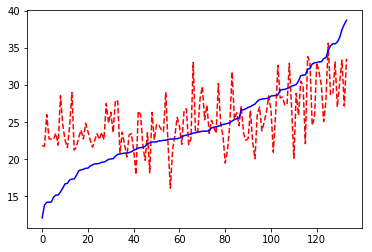

In [21]:
plt.figure()
plt.plot(y_all_sorted["predicted_happy"].values,'r--',y_all_sorted[LABEL].values,'b')